# Visual Inspection

# 1. Pre-Processing of Data
- to ensure the features work as intended


## 1.1 import the data

In [30]:
import df_manipulation_functions as dfmf
import pandas as pd
import matplotlib.pyplot as plt


In [31]:
#read in the the flow and temp data
flow_temp_df = dfmf.create_flow_temp_df("Data/Temp/*.txt","Data/Flow/*.txt") 
#save the dataframe as pickle file
flow_temp_df.to_pickle("Data/flow_temp_df.pkl")
#read in the pickle file
flow_temp_df = pd.read_pickle("Data/flow_temp_df.pkl")
flow_temp_df.head()

,Zeitstempel,Stationsname,Stationsnummer,Flow_Wert,Temp_Wert,Gewässer
0,1980-01-01 00:00:00,Porte du Scex,2009,82.533,3.7,Rhône
1,1980-01-02 00:00:00,Porte du Scex,2009,117.734,3.3,Rhône
2,1980-01-03 00:00:00,Porte du Scex,2009,144.834,3.4,Rhône
3,1980-01-04 00:00:00,Porte du Scex,2009,148.472,3.4,Rhône
4,1980-01-05 00:00:00,Porte du Scex,2009,112.333,3.4,Rhône


## 1.2 Visual inspection of flow data

- plot two example stations to have a close look at two different curves
- plot all the stations in one plot to see the general trend of the data
- to see if there are any outliers
- to see if there are any stations that are not working properly

### 1.2.1 Plot one station 
- over different time periods (e.g three years, one year)
- make use of averaging over time 
- use average window function to get a smoother curve

In [32]:
# chose station 2019 and get the station data
example_station_number = 2019
Wert = 'Flow_Wert'
example_station_df = dfmf.get_station_df(example_station_number, flow_temp_df)
example_station_df.head()

,Stationsnummer,Zeitstempel,Flow_Wert,Temp_Wert
44921,2019,1980-01-01 00:00:00,14.656,3.9
44922,2019,1980-01-02 00:00:00,22.752,3.4
44923,2019,1980-01-03 00:00:00,23.579,3.3
44924,2019,1980-01-04 00:00:00,25.064,3.4
44925,2019,1980-01-05 00:00:00,17.645,4.1


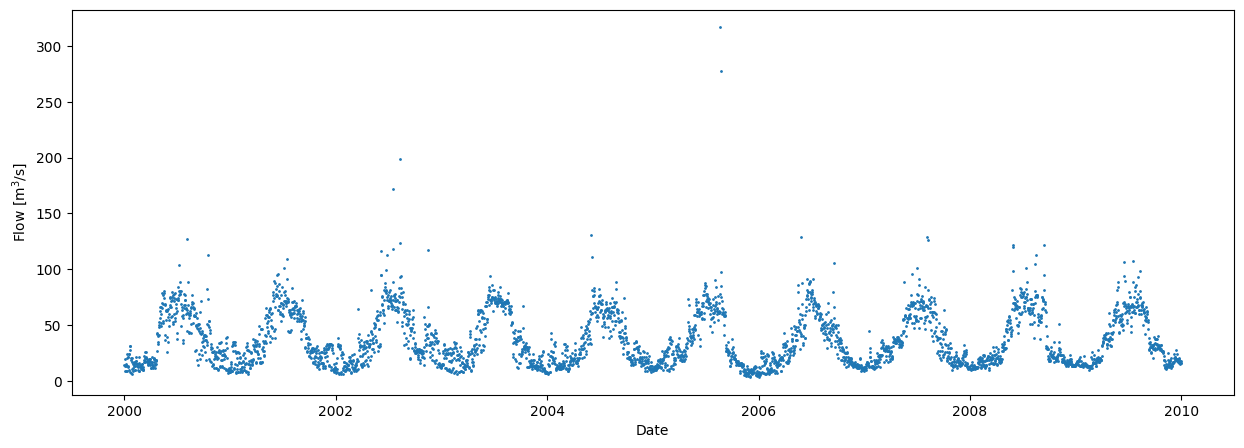

In [33]:
# get three years time period
example_station_3years_df = dfmf.get_time_period(example_station_number, '2000-01-01', '2010-01-01', flow_temp_df)

#plot the station data
plt.figure(figsize=(15,5))
plt.scatter(example_station_3years_df.index, example_station_3years_df[Wert], label=Wert, s=1)
station_name = flow_temp_df.loc[flow_temp_df['Stationsnummer'] == example_station_number]['Stationsname'].unique()[0]
plt.xlabel('Date')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')
#plt.title(station_name + " " + str(example_station_number))

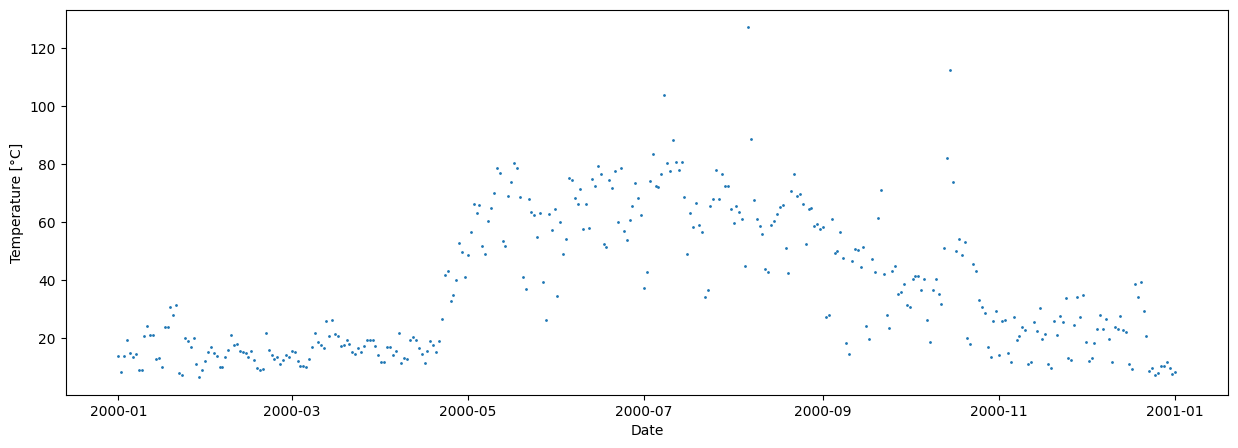

In [34]:

#get one year time period
example_station_1year_df = dfmf.get_time_period(example_station_number, '2000-01-01', '2001-01-01', flow_temp_df)

#plot the station data over one year
plt.figure(figsize=(15,5))
plt.scatter(example_station_1year_df.index, example_station_1year_df[Wert], label=Wert, s=1)
plt.xlabel('Date')
if Wert == 'Temp_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:  
    plt.ylabel('Temperature [°C]')

### Results
- The data is noisy due to the interval of the measurements
- we do averageing by day over the 40 years of data to get a clearer curve


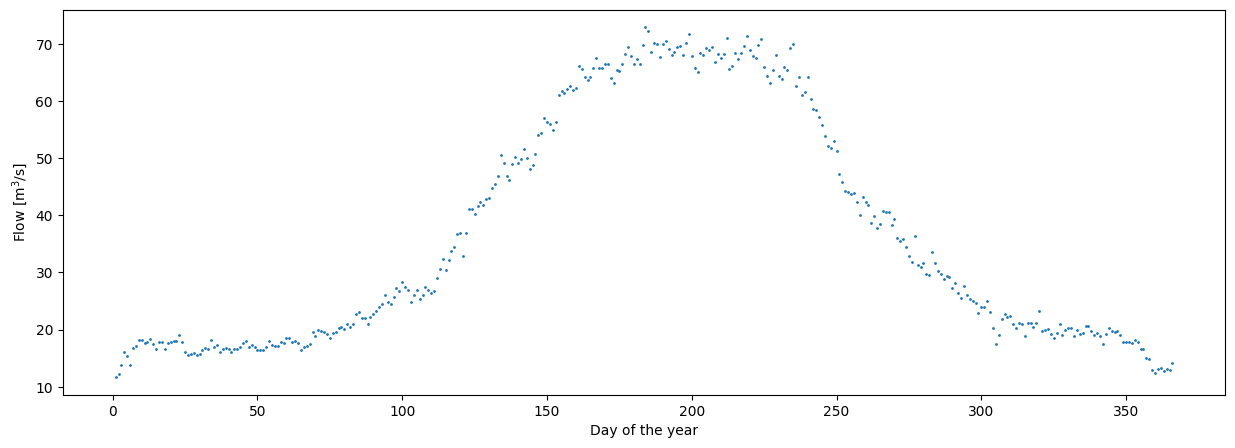

In [35]:
station_daily_averaged_df = dfmf.get_daily_averaged_df(example_station_number, flow_temp_df)
station_daily_averaged_df.head()

#plot the daily averaged data
plt.figure(figsize=(15,5))
plt.scatter(station_daily_averaged_df.index, station_daily_averaged_df[Wert], label=Wert, s=1)
plt.xlabel('Day of the year')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')

### Results
- The curve looks better but still a bit noisy


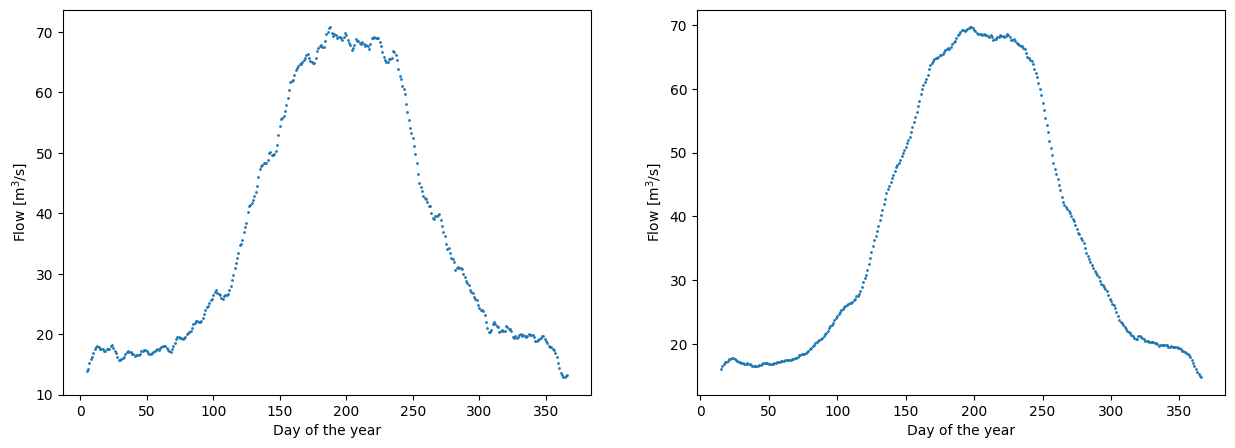

In [36]:
# get running mean of 5 days
window_length_long = 15
window_length_short = 5

station_daily_averaged_5days_mean_df = dfmf.get_running_mean_df(example_station_number, window_length_short, flow_temp_df, Wert)
station_daily_averaged_15days_mean_df = dfmf.get_running_mean_df(example_station_number, window_length_long, flow_temp_df, Wert)

#plot the daily averaged data for both window lengths in plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.scatter(station_daily_averaged_5days_mean_df.index, station_daily_averaged_5days_mean_df[Wert], label=Wert, s=1)
ax2.scatter(station_daily_averaged_15days_mean_df.index, station_daily_averaged_15days_mean_df[Wert], label=Wert, s = 1)
ax1.set_xlabel('Day of the year')
if Wert == 'Flow_Wert':
    ax1.set_ylabel('Flow [m$^3$/s]')
else:
    ax1.set_ylabel('Temperature [°C]')

ax2.set_xlabel('Day of the year')
if Wert == 'Flow_Wert':
    ax2.set_ylabel('Flow [m$^3$/s]')
else:
    ax2.set_ylabel('Temperature [°C]')

## Results
- The curve loooks like a continuing function and the now calculated features might give reasonable values


## 1.2.2 Non Periodic station 
- there are some stations whick lack the clear periodicity of the given example 


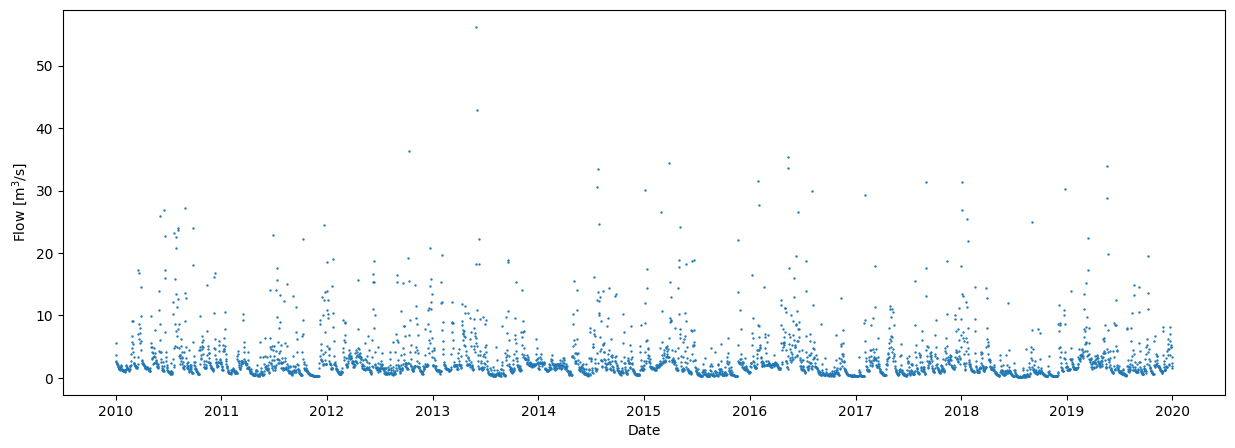

In [37]:
example_station_number2 = 2374
example_station_3years_df = dfmf.get_time_period(example_station_number2, '2010-01-01', '2020-01-01', flow_temp_df)

#plot the station data
plt.figure(figsize=(15,5))
plt.scatter(example_station_3years_df.index, example_station_3years_df[Wert], label=Wert, s=0.5)
station_name = flow_temp_df.loc[flow_temp_df['Stationsnummer'] == example_station_number2]['Stationsname'].unique()[0]
plt.xlabel('Date')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]') 
# plt.title(station_name + " " + str(example_station_number2))

Text(0, 0.5, 'Flow [m$^3$/s]')

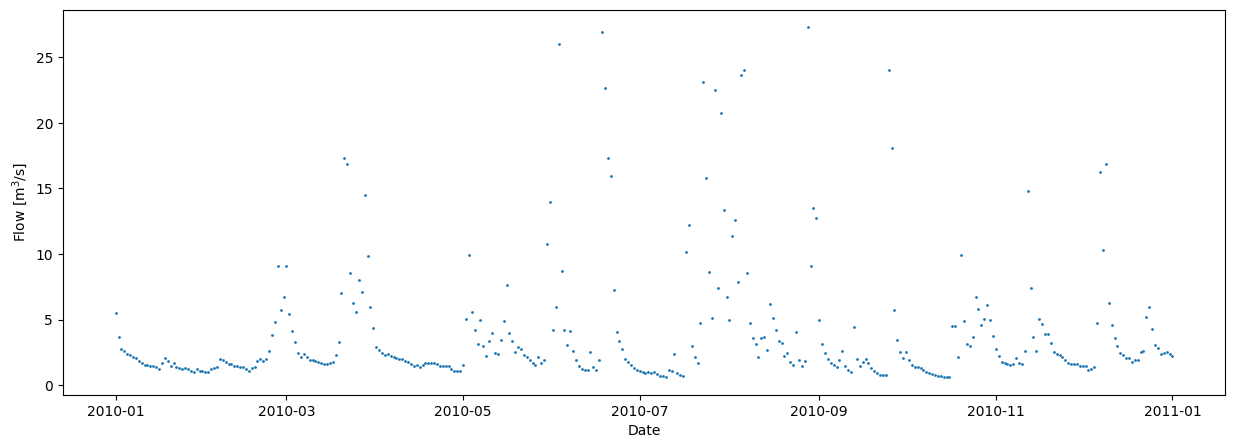

In [38]:
#get one year time period
example_station_1year_df = dfmf.get_time_period(example_station_number2, '2010-01-01', '2011-01-01', flow_temp_df)
#plot the station data over one year
plt.figure(figsize=(15,5))
plt.scatter(example_station_1year_df.index, example_station_1year_df[Wert], label=Wert, s=1)
plt.xlabel('Date')
plt.ylabel('Flow [m$^3$/s]')

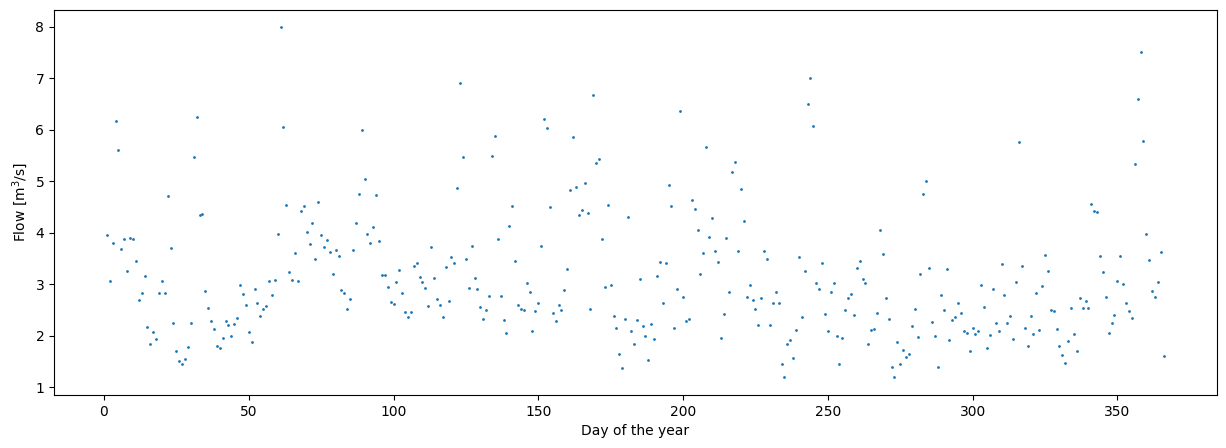

In [39]:
station_daily_averaged_df = dfmf.get_daily_averaged_df(example_station_number2, flow_temp_df)
station_daily_averaged_df.head()

#plot the daily averaged data
plt.figure(figsize=(15,5))
plt.scatter(station_daily_averaged_df.index, station_daily_averaged_df[Wert], label=Wert, s=1)
plt.xlabel('Day of the year')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')



# Results
- for this station there is no clear periodicity visible 
- it will be difficult to analyze this data with the same features as the other ones
- maybe there needs to be a feature vor periodicity (similarity by year)

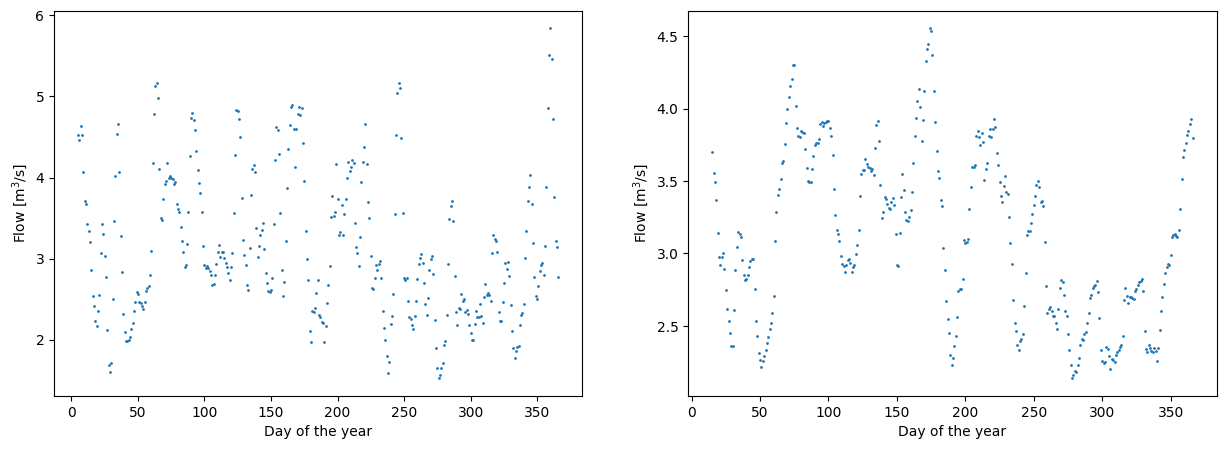

In [40]:
# get running mean of 5 days
window_length_long = 15
window_length_short = 5


station_daily_averaged_5days_mean_df = dfmf.get_running_mean_df(example_station_number2, window_length_short, flow_temp_df, Wert)
station_daily_averaged_15days_mean_df = dfmf.get_running_mean_df(example_station_number2, window_length_long, flow_temp_df, Wert)

#plot the daily averaged data for both window lengths in plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.scatter(station_daily_averaged_5days_mean_df.index, station_daily_averaged_5days_mean_df[Wert], label=Wert, s=1)
ax2.scatter(station_daily_averaged_15days_mean_df.index, station_daily_averaged_15days_mean_df[Wert], label=Wert, s=1)
ax1.set_xlabel('Day of the year')
if Wert == 'Flow_Wert':
    ax1.set_ylabel('Flow [m$^3$/s]')
else:
    ax1.set_ylabel('Temperature [°C]')
ax2.set_xlabel('Day of the year')
if Wert == 'Flow_Wert':
    ax2.set_ylabel('Flow [m$^3$/s]')
else:
    ax2.set_ylabel('Temperature [°C]')



## Results
- the curve looks still very noisy and it is difficult to say wether this actually resembles some behaviour

# 2. Analysis of all curves and deduction of features


## 2.1 Plot all Stations

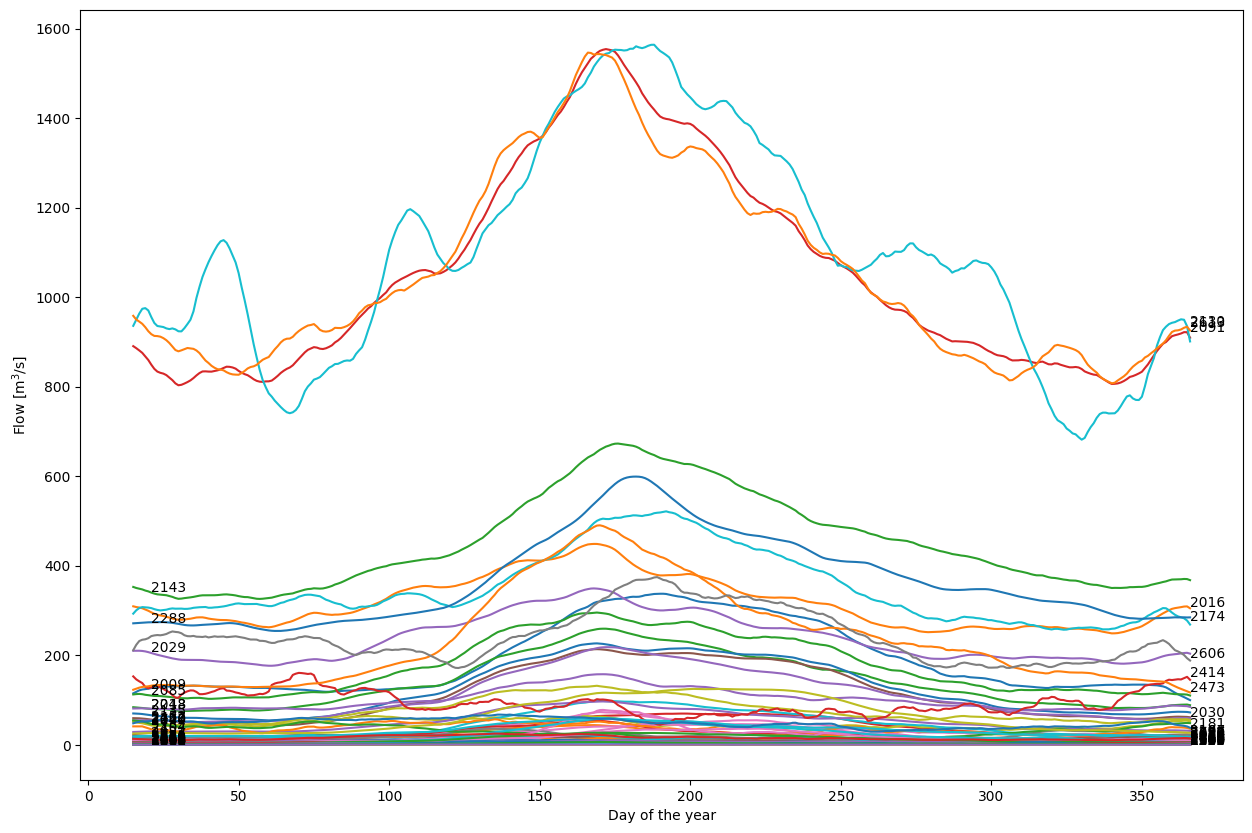

In [41]:
# plot all window function data of each station in one plot
window_length_long = 15

i = 20

plt.figure(figsize=(15,10))
for station_number in flow_temp_df['Stationsnummer'].unique():
    station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df,Wert)
    plt.plot(station_df.index, station_df[Wert], label=station_number)
    
    plt.annotate(station_number, xy=(station_df.index[i], station_df[Wert][i]))
    
   
    if(i == 20):
        i = 365
    else:
        i=20
    #annotate the plotted points with the station number
#plot labels on the corresponding curve
plt.xlabel('Day of the year')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')

    

# plt.figure(figsize=(20,50))
# for station_number in flow_temp_df['Stationsnummer'].unique():
#     station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, 'Temp_Wert')
#     plt.scatter(station_df.index, station_df['Temp_Wert'], label=station_number)

# #limit plot to positive values
# plt.ylim(0, 30)
# plt.show()



## Result 
- The data with a larger flow mean all look like curves of clear periodicity 
- for some with less flow the curve looks way more noisy 
- for the curves below 100 cubic in this plot nothing is visible 


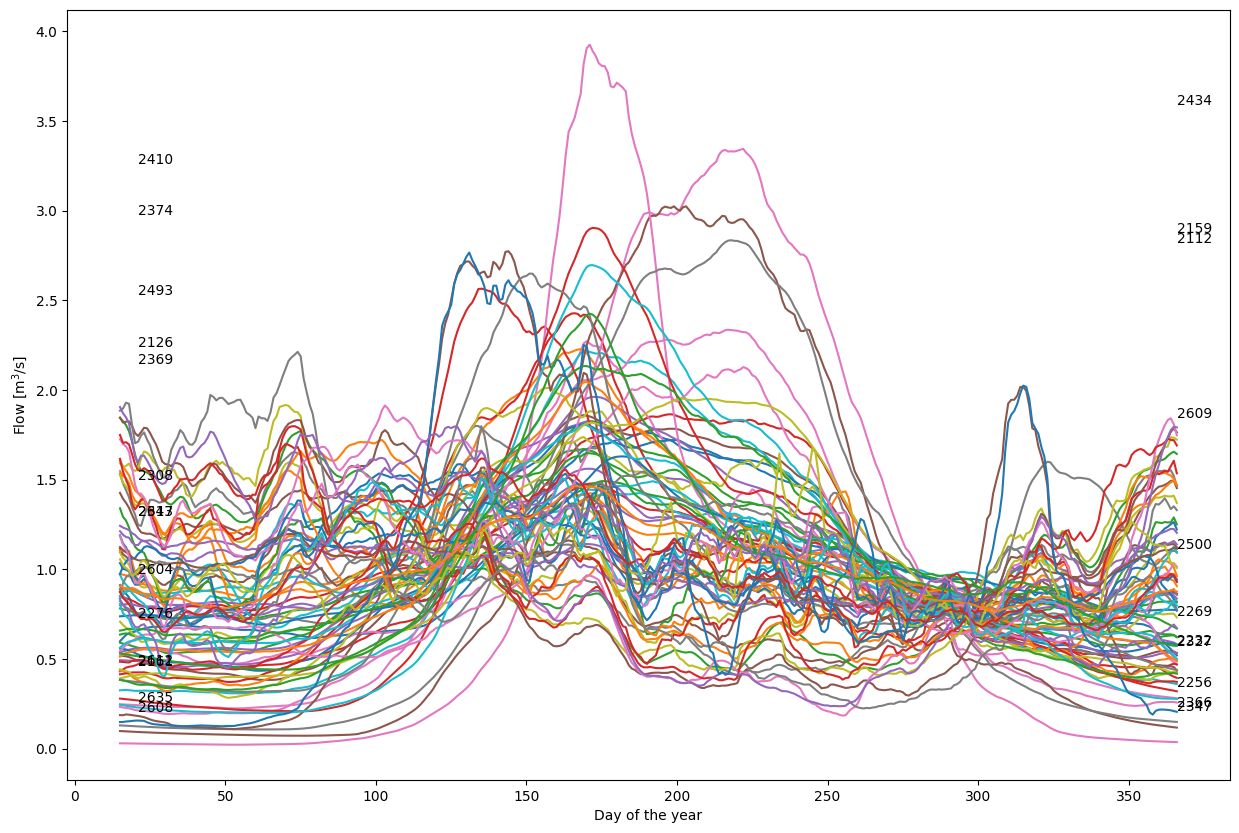

In [42]:
# plot all window function data of each station in one plot
import numpy as np
window_length_long = 15
i = 20
#plot the data normalized by the mean of each station 
plt.figure(figsize=(15,10))
for station_number in flow_temp_df['Stationsnummer'].unique():
    station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    plt.plot(station_df.index, station_df[Wert] / np.mean(station_df[Wert]), label=station_number)
    plt.annotate(station_number, xy=(station_df.index[i], station_df[Wert][i]))
    if(i == 20):
        i = 365
    else:
        i=20
    #annotate the plotted points with the station number
#plot labels on the corresponding curve
plt.xlabel('Day of the year')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')
plt.show()



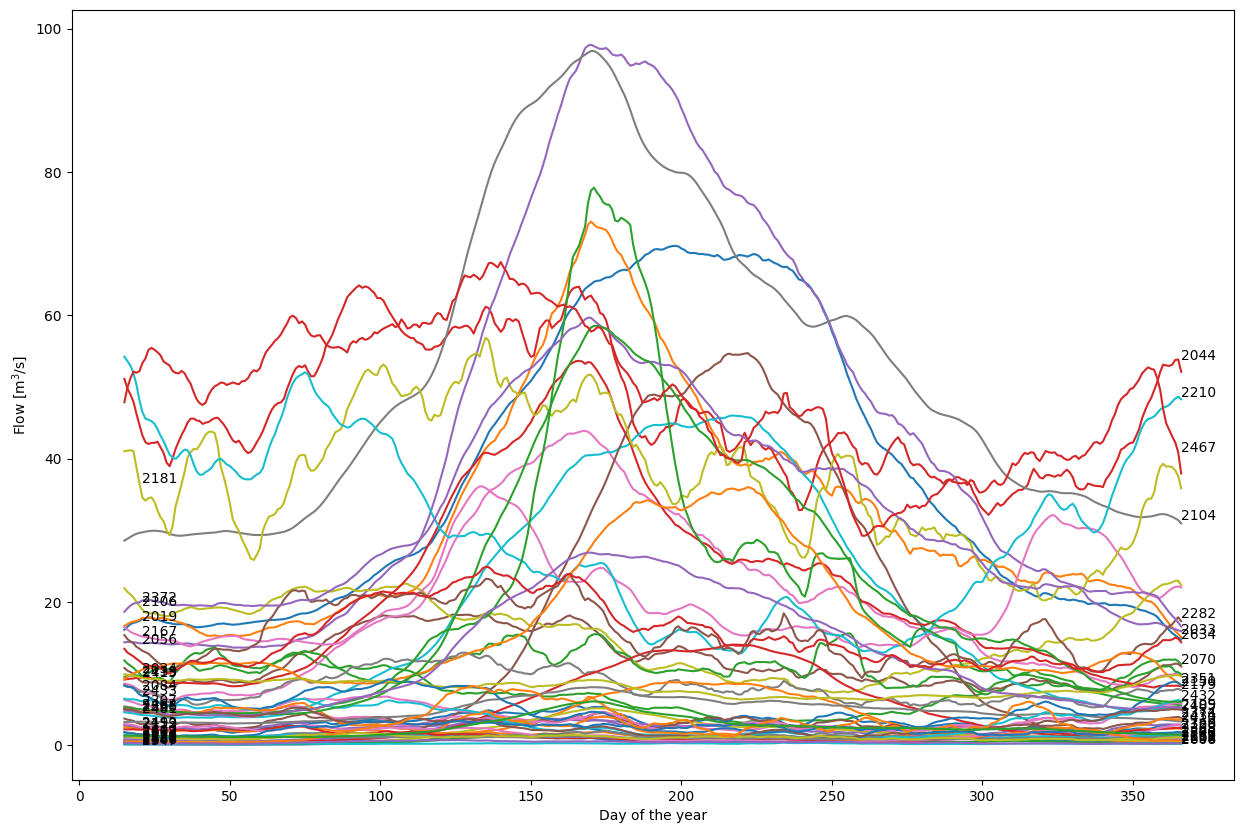

In [43]:
# plot the flow data of all the stations for max flow below 100 
window_length_long = 15
i = 20
plt.figure(figsize=(15,10))
for station_number in flow_temp_df['Stationsnummer'].unique():
    station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    if(station_df[Wert].max() < 100):
        plt.plot(station_df.index, station_df[Wert], label=station_number)
        plt.annotate(station_number, xy=(station_df.index[i], station_df[Wert][i]))
        if(i == 20):
            i = 365
        else:
            i=20
    #annotate the plotted points with the station number    
#plot labels on the corresponding curve
plt.xlabel('Day of the year')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')
    
plt.show()


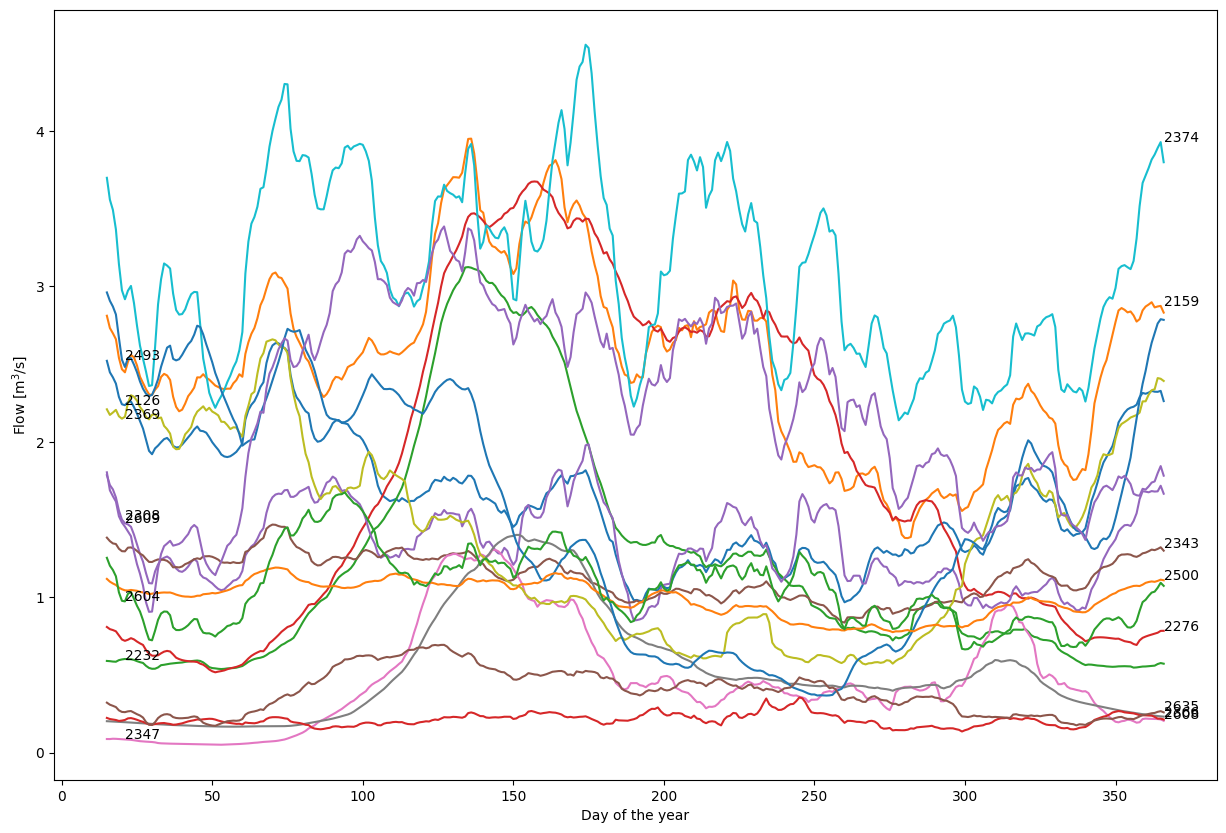

In [44]:
# plot the flow data of all the stations for max flow below 20
window_length_long = 15

i = 20

plt.figure(figsize=(15,10))
for station_number in flow_temp_df['Stationsnummer'].unique():
    station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    if(station_df[ Wert].max() < 5):
        plt.plot(station_df.index, station_df[Wert], label=station_number)
    
        plt.annotate(station_number, xy=(station_df.index[i], station_df[Wert][i]))
    
   
        if(i == 20):
            i = 365
        else:
            i=20
    #annotate the plotted points with the station number
#plot labels on the corresponding curve
plt.xlabel('Day of the year')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')
plt.show()


## Results
- The less flow the more noisy the curve looks
- the curves with less flow are more difficult to analyze
- this is due to the fact, that smaller flows are more affected by rainfalls and other weather conditions
- the curves with more flow are more stable and therefore easier to analyze

## 2.2 visual inspection of typical curves for flow data
- to get a feeling for the data
- plot the chosen functions in one plot to see the general differences
- plot the chosen functions in different plots ti have a look at std and average time over a certain value
 

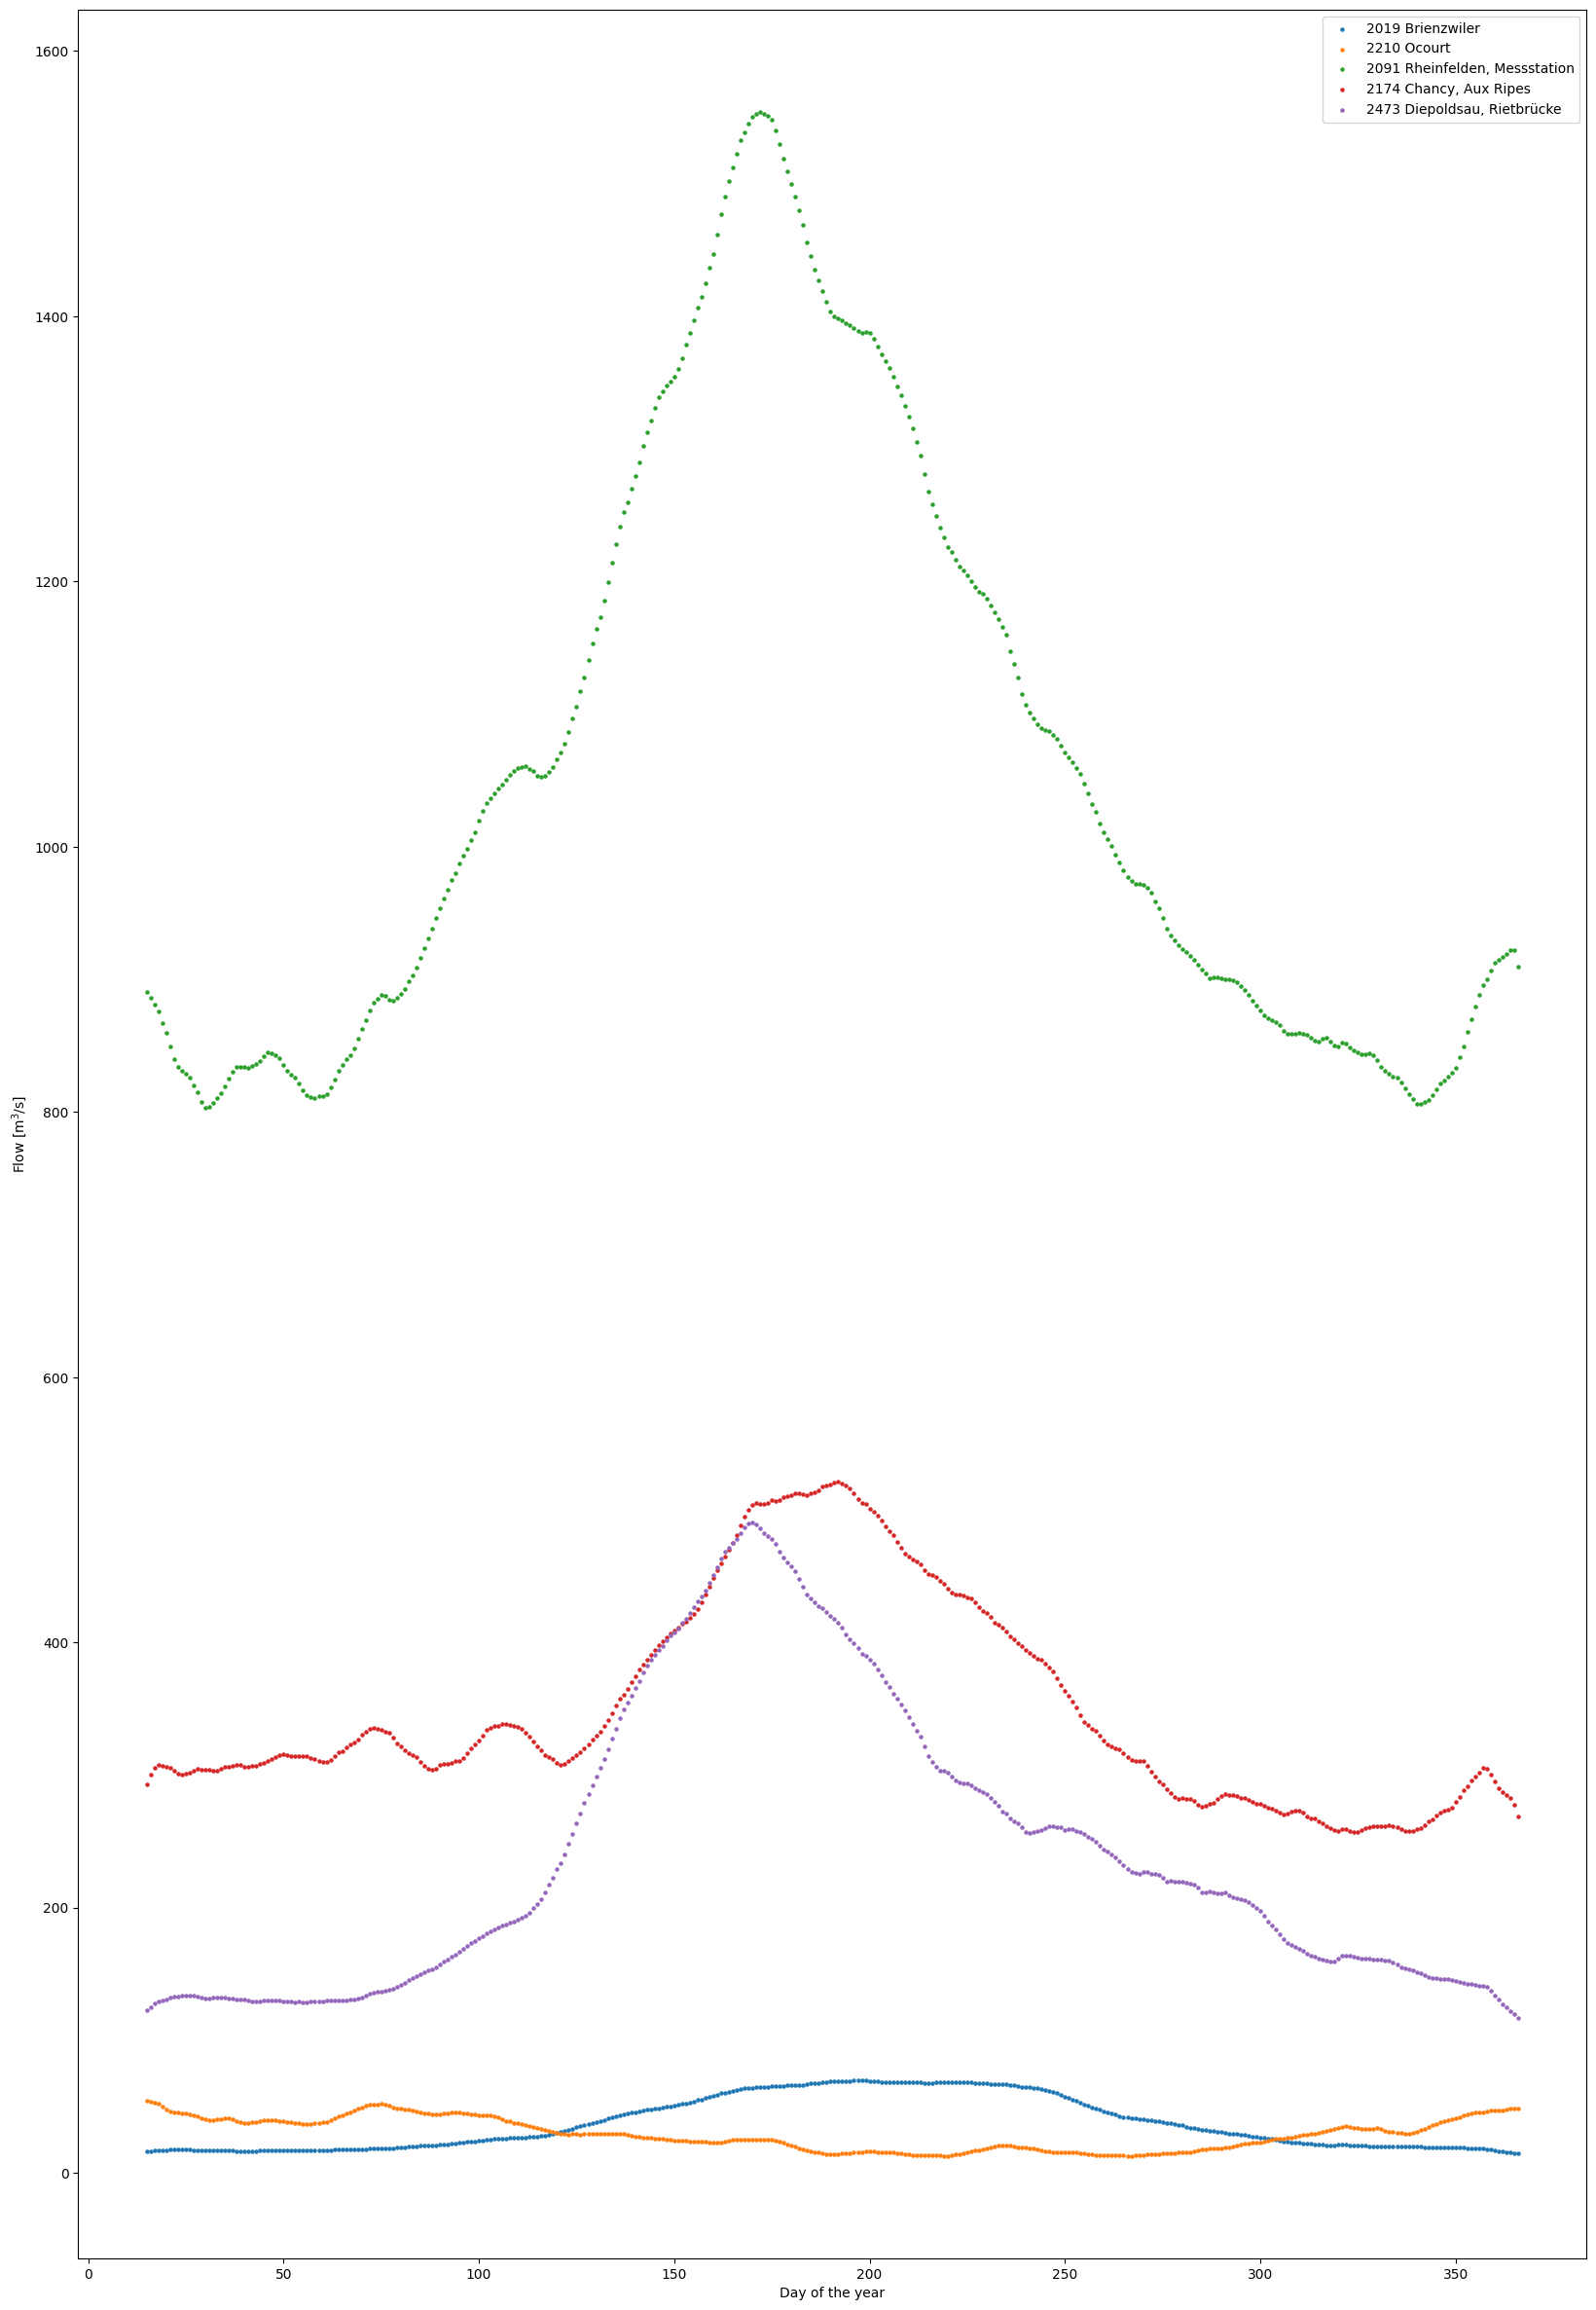

In [45]:
special_stations_numbers = [2019,2210,2091,2174, 2473]

labels = list()
#plot the stations belonging to the special station numbers
plt.figure(figsize=(20,30))
for station in special_stations_numbers:
    station_data = dfmf.get_running_mean_df(station, 15, flow_temp_df, Wert)
    plt.scatter(station_data.index, station_data[Wert], s = 5)
    station_data['mean'] = station_data[Wert].mean()
    #plt.plot(station_data.index, station_data['mean'])
    #add to each curve the number and name of the station
    station_name = flow_temp_df.loc[flow_temp_df['Stationsnummer'] == station]['Stationsname'].unique()[0]
    labels.append(str(station)+ " " + station_name)       
plt.xlabel('Day of the year')

if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')
    
plt.legend(labels)


## Results:
- It is clearly visible that we got different averages and different std's
- The flux starts increasing at different times
- some of the stations are highly influenced by rainfalls or dams

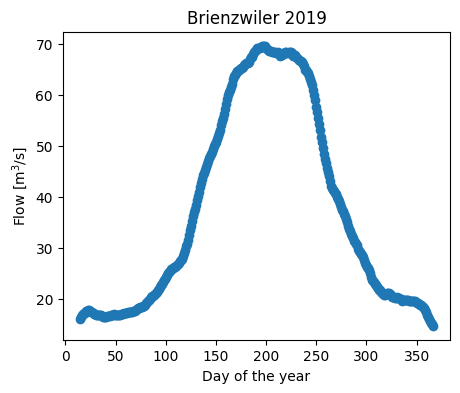

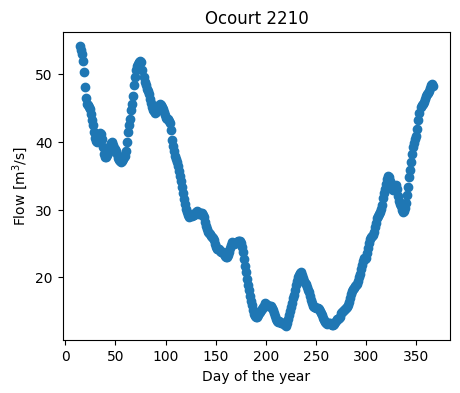

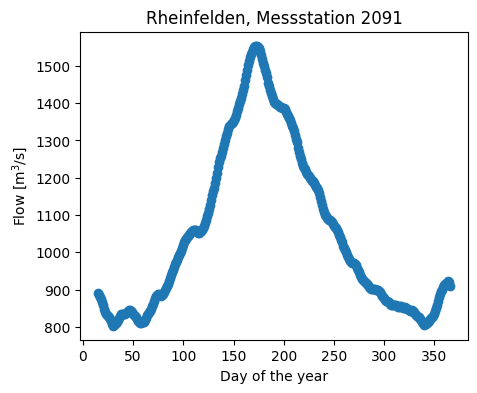

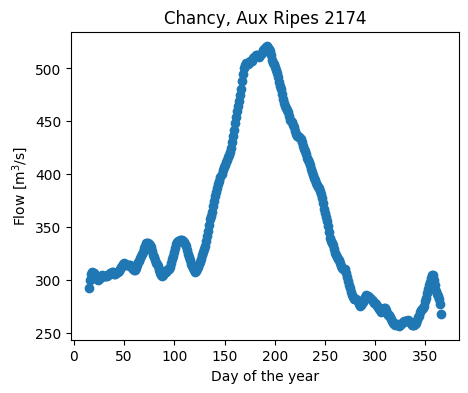

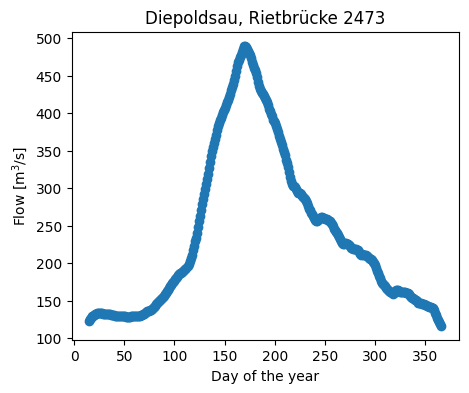

In [46]:
# plot the special stations seperatly

for station_number in special_stations_numbers:
    station_data = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    plt.figure(figsize=(5,4))
    plt.scatter(station_data.index, station_data[Wert])
    #print stations name and number	as title
    station_name = flow_temp_df.loc[flow_temp_df['Stationsnummer'] == station_number]['Stationsname'].unique()[0]
    plt.title(station_name + ' ' + str(station_number))

    plt.xlabel('Day of the year')
    if Wert == 'Flow_Wert':
        plt.ylabel('Flow [m$^3$/s]')
    else:
        plt.ylabel('Temperature [°C]')
        
    
    plt.show()


## Results:
- we see three main types of curves
- 2019 with a steady increase and a long time period of high flow
- 2091 with a steep increase and a short time period of maximum flow and a high average flow
- 2210 with an abnormal flow pattern due to a dam, with high flow in winter and low flow in summer, additionally the flow is very irregular


# 3. Feature tests
- goal: to find features which characterize the above mentioned curves


In [47]:

# create df with same columns as staion_df
merged_station_running_df = pd.DataFrame(columns=['Zeitstempel', 'Stationsnummer',	'Flow_Wert', 	'Temp_Wert'])
chosen_example_station_numbers = [2019,2210,2091]

for station_number in chosen_example_station_numbers:
    station_data = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    merged_station_running_df = merged_station_running_df.append(station_data)

merged_station_running_df.head()



C:\Users\janzu\AppData\Local\Temp\ipykernel_25812\3474461945.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_station_running_df = merged_station_running_df.append(station_data)
C:\Users\janzu\AppData\Local\Temp\ipykernel_25812\3474461945.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_station_running_df = merged_station_running_df.append(station_data)
C:\Users\janzu\AppData\Local\Temp\ipykernel_25812\3474461945.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_station_running_df = merged_station_running_df.append(station_data)


,Zeitstempel,Stationsnummer,Flow_Wert,Temp_Wert
1,NaN,2019.0,NaN,4.062250
2,NaN,2019.0,NaN,3.931463
3,NaN,2019.0,NaN,3.888293
4,NaN,2019.0,NaN,3.790000
5,NaN,2019.0,NaN,3.802195


In [48]:
#calculate the mean of the running mean, std, min, max, median, values for each station and save them to df ruda_features_df
basic_features_df = pd.DataFrame(columns=['Stationsnummer', 'mean', 'std', 'min', 'max', 'median'])
for station_number in chosen_example_station_numbers:
    station_data = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    basic_features_df = basic_features_df.append({'Stationsnummer': station_number, 'mean': station_data[Wert].mean(), 'std': station_data[Wert].std(), 'min': station_data[Wert].min(), 'max': station_data[Wert].max(), 'median': station_data[Wert].median(), 'range': station_data[Wert].max()-station_data[Wert].min()}, ignore_index=True)
basic_features_df.head()

C:\Users\janzu\AppData\Local\Temp\ipykernel_25812\752196699.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basic_features_df = basic_features_df.append({'Stationsnummer': station_number, 'mean': station_data[Wert].mean(), 'std': station_data[Wert].std(), 'min': station_data[Wert].min(), 'max': station_data[Wert].max(), 'median': station_data[Wert].median(), 'range': station_data[Wert].max()-station_data[Wert].min()}, ignore_index=True)
C:\Users\janzu\AppData\Local\Temp\ipykernel_25812\752196699.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basic_features_df = basic_features_df.append({'Stationsnummer': station_number, 'mean': station_data[Wert].mean(), 'std': station_data[Wert].std(), 'min': station_data[Wert].min(), 'max': station_data[Wert].max(), 'median': station_data[Wert].median(), 'range': sta

,Stationsnummer,mean,std,min,max,median,range
0,2019.0,37.377797,19.845988,14.741146,69.685184,29.096628,54.944038
1,2210.0,29.369641,11.948027,12.824196,54.216881,29.085600,41.392685
2,2091.0,1050.838014,225.168084,803.101167,1554.169571,971.948023,751.068405


## 3.1 Show the different features in the plotted data

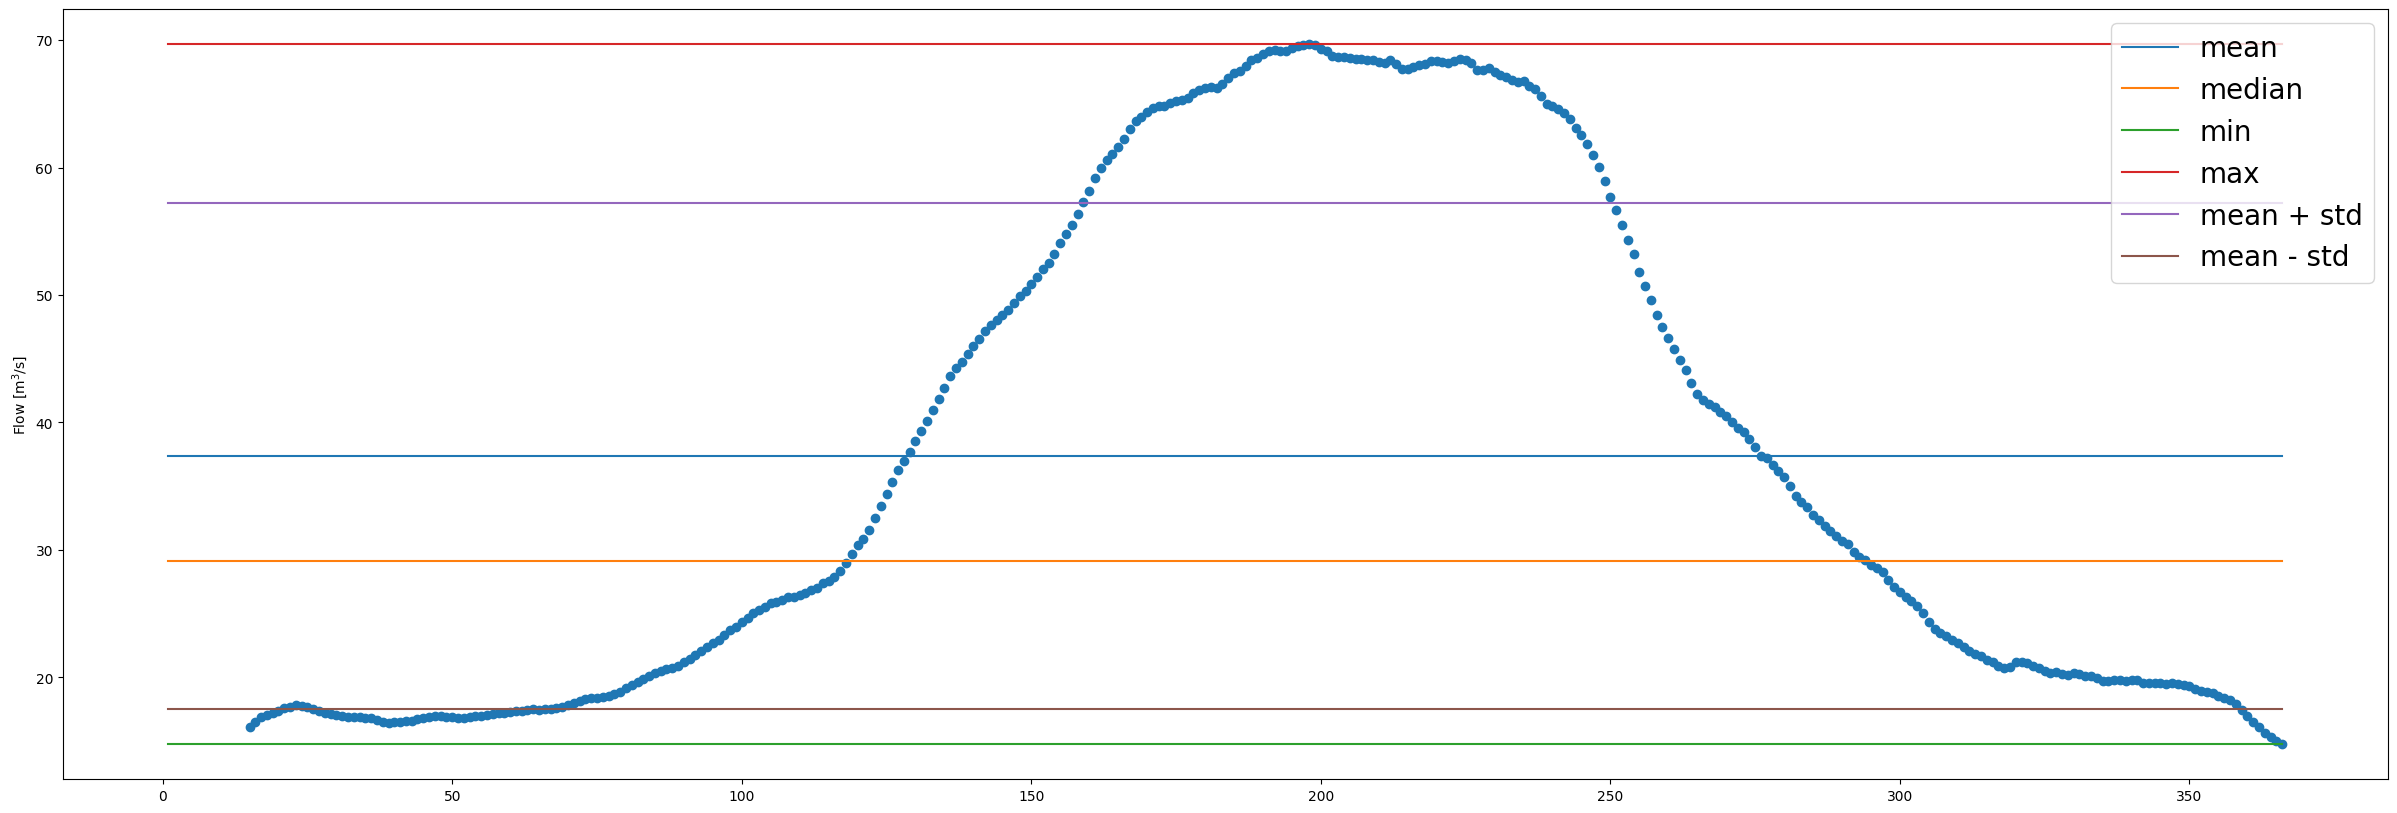

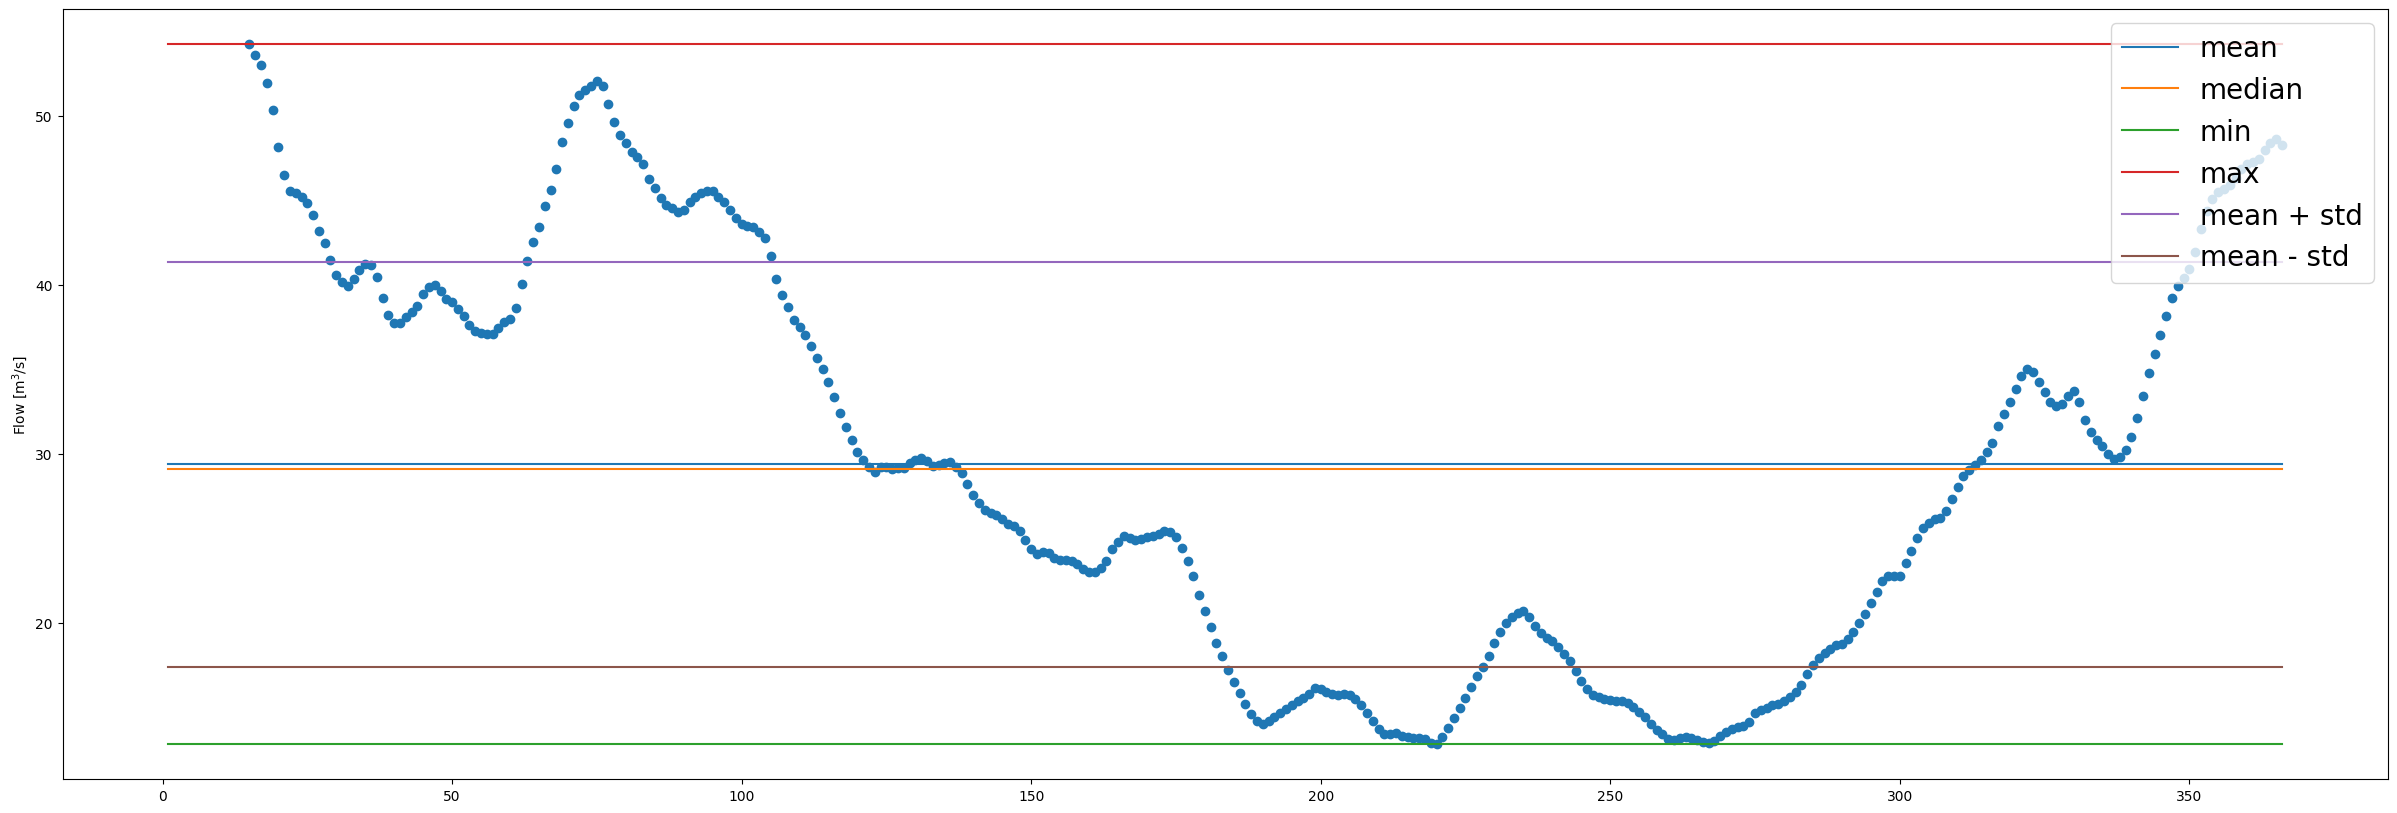

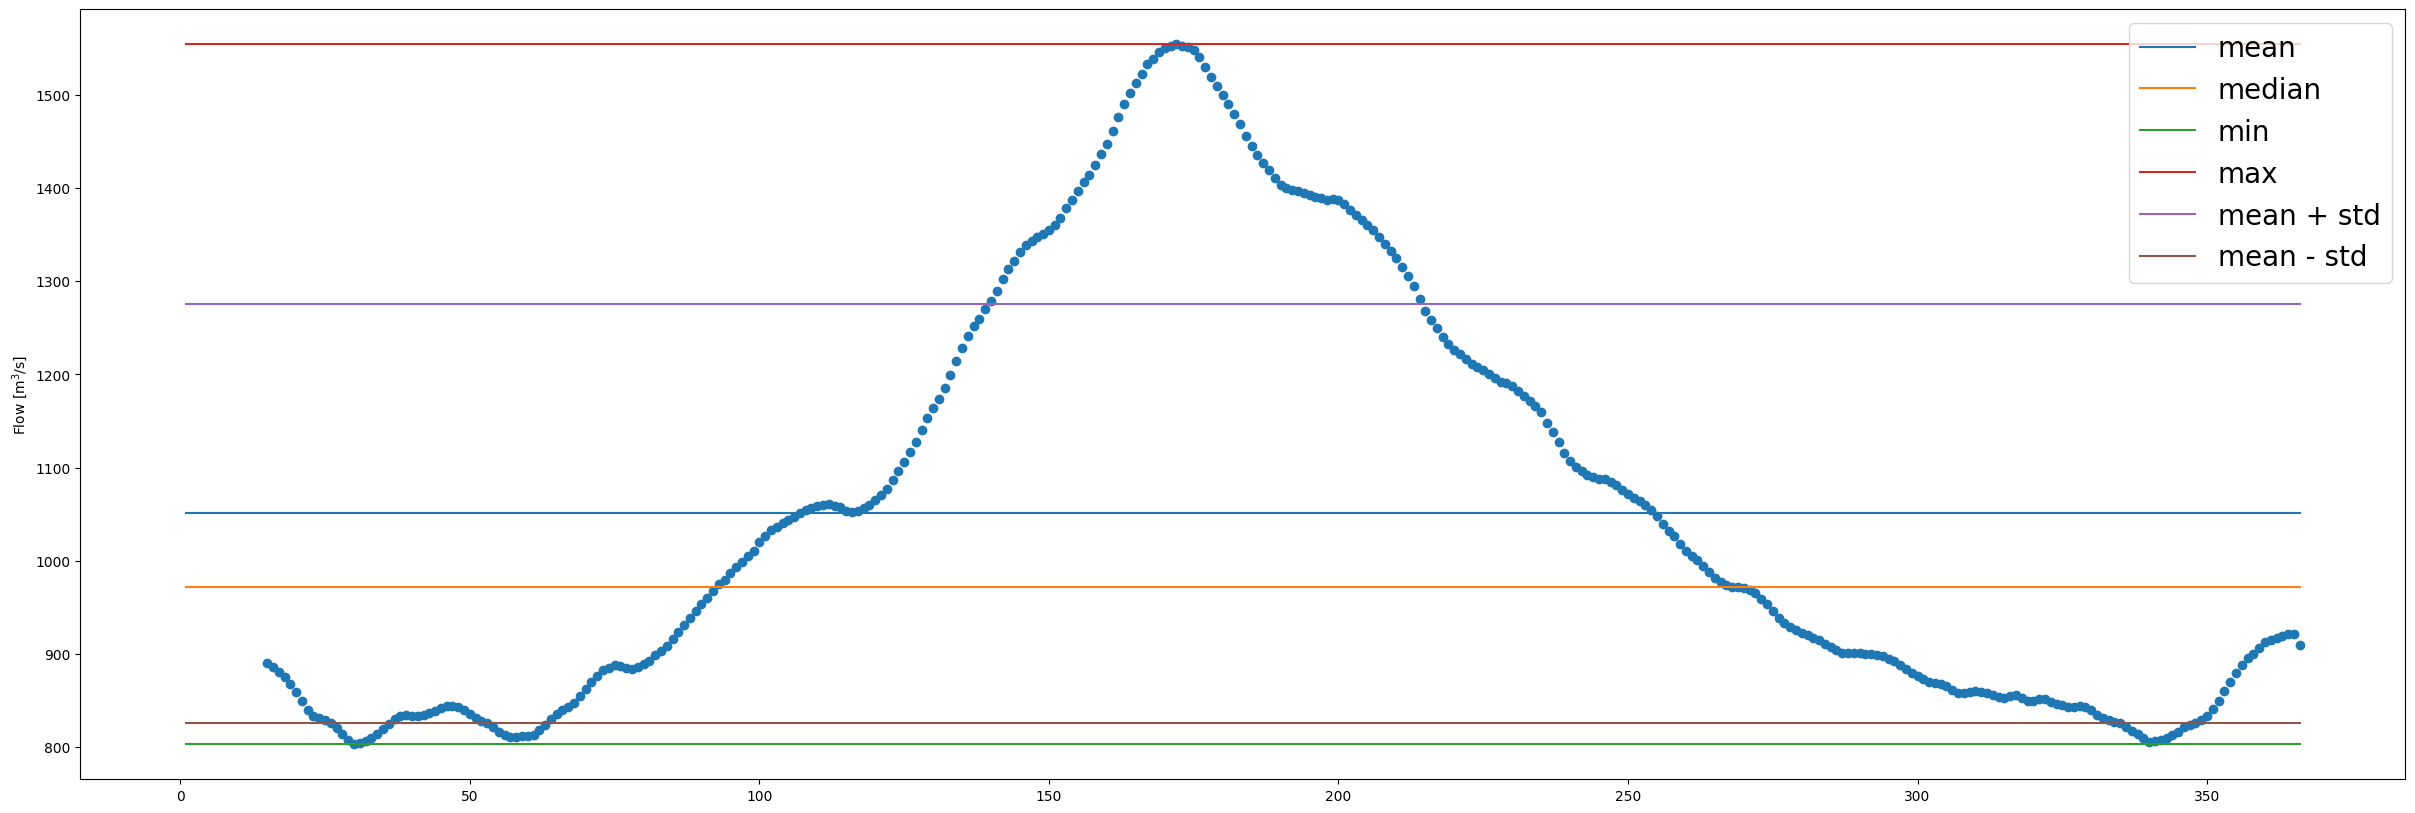

In [49]:
for station_number in chosen_example_station_numbers:
    #plot min, max and mean and median of each station
    station_data = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    plt.figure(figsize=(30,10))
    plt.scatter(station_data.index, station_data[Wert])
    plt.plot(station_data.index, [station_data[Wert].mean()] *366, label='mean')
    plt.plot(station_data.index, [station_data[Wert].median()]*366, label='median')
    plt.plot(station_data.index, [station_data[Wert].min()]*366, label='min')
    plt.plot(station_data.index, [station_data[Wert].max()]*366, label='max')
    # plot the standard deviation in an appropriate way
    plt.plot(station_data.index, [station_data[Wert].mean() + station_data[Wert].std()]*366, label='mean + std')
    plt.plot(station_data.index, [station_data[Wert].mean() - station_data[Wert].std()]*366, label='mean - std')
    station_name = flow_temp_df.loc[flow_temp_df['Stationsnummer'] == station_number]['Stationsname'].unique()[0]
    #plt.title(station_name + ' ' + str(station_number))
    #make bigger legend
    plt.legend( loc="upper right", fontsize = "20")
    if Wert == 'Flow_Wert':
        plt.ylabel('Flow [m$^3$/s]')
    else:
        plt.ylabel('Temperature [°C]')
        
    plt.ylabel('Flow [m$^3$/s]')

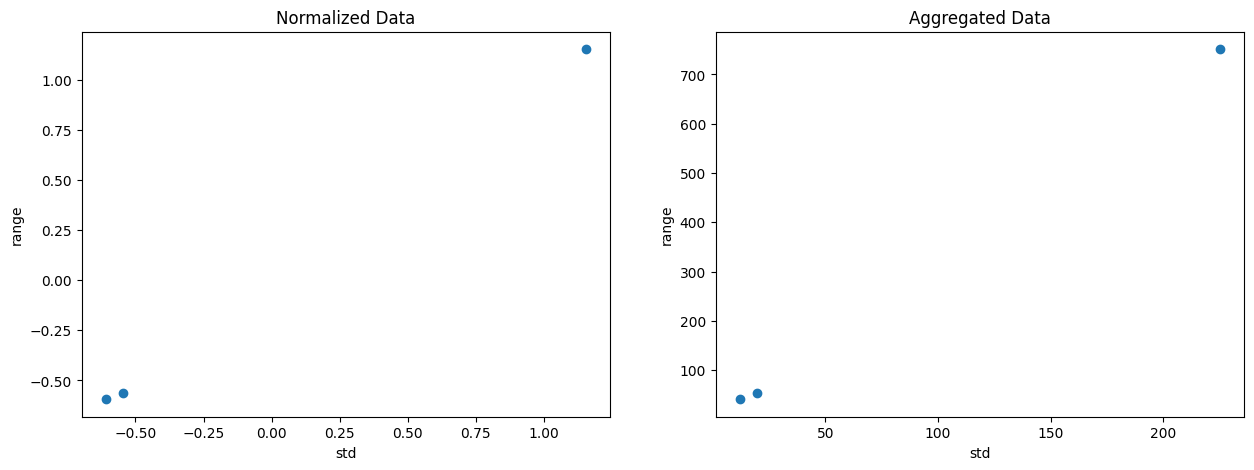

In [50]:
#plot the range and std of the ruda_fetures_df in a scatterpllot
basic_normalized_chosen_df = dfmf.normalize_data(basic_features_df)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# ax1.set_xlim(-10,600)
# ax2.set_xlim(-10,600)
# ax1.set_ylim(-10,16)
# ax2.set_ylim(-10,16)
ax1.scatter(basic_normalized_chosen_df['std'], basic_normalized_chosen_df['range'])
ax1.set_title('Normalized Data')
ax1.set_xlabel('std')
ax1.set_ylabel('range')
ax2.scatter(basic_features_df['std'], basic_features_df['range'])
ax2.set_title('Aggregated Data')
ax2.set_xlabel('std')
ax2.set_ylabel('range')
plt.show()

c:\Users\janzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Text(0, 0.5, 'y_MDS')

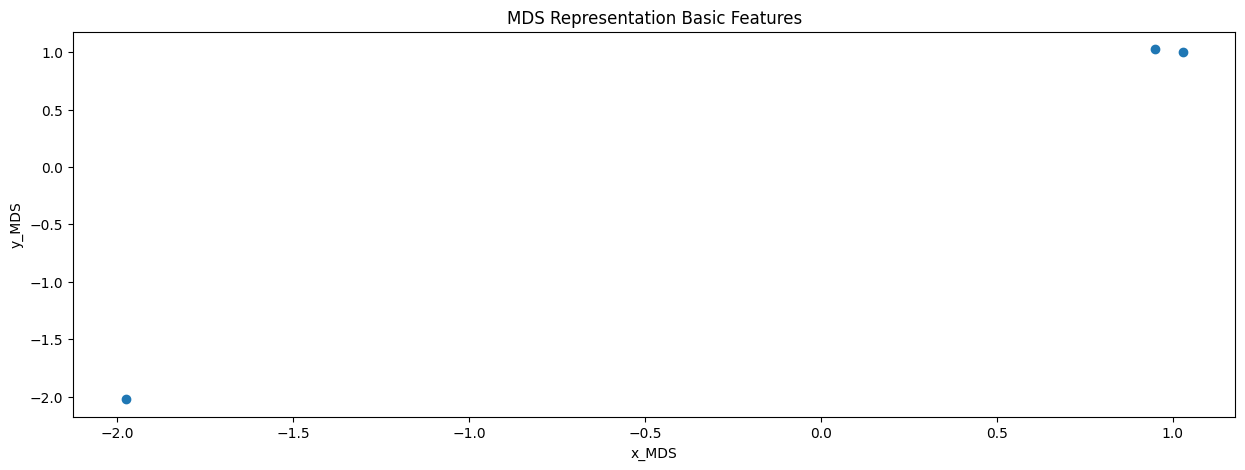

In [51]:
basic_mds_chosen_rep = dfmf.create_mds_represntation(basic_normalized_chosen_df)
#plot the mds
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 5))
ax1.scatter(basic_mds_chosen_rep['x_MDS'], basic_mds_chosen_rep['y_MDS'])
ax1.set_title('MDS Representation Basic Features')
ax1.set_xlabel('x_MDS')
ax1.set_ylabel('y_MDS')

## Results:
- looks like might give good clustering results


## 3.2 check with mds for all station

C:\Users\janzu\AppData\Local\Temp\ipykernel_25812\4194261927.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basic_features_all_df = basic_features_all_df.append({'Stationsnummer': station_number, 'mean': station_data[Wert].mean(), 'std': station_data[Wert].std(), 'min': station_data[Wert].min(), 'max': station_data[Wert].max(), 'median': station_data[Wert].median(), 'range': station_data[Wert].max()-station_data[Wert].min()}, ignore_index=True)
C:\Users\janzu\AppData\Local\Temp\ipykernel_25812\4194261927.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basic_features_all_df = basic_features_all_df.append({'Stationsnummer': station_number, 'mean': station_data[Wert].mean(), 'std': station_data[Wert].std(), 'min': station_data[Wert].min(), 'max': station_data[Wert].max(), 'median': station_data[Wert].medi

,Stationsnummer,mean,std,min,max,median,range
0,2009.0,191.718588,78.184269,99.655775,337.357060,146.840939,237.701285
1,2016.0,317.204267,56.663119,248.814842,448.665434,299.042810,199.850592
2,2018.0,142.028263,58.771445,75.528888,259.285767,125.308693,183.756880
3,2019.0,37.377797,19.845988,14.741146,69.685184,29.096628,54.944038
4,2029.0,236.547887,51.864645,176.469974,349.239436,209.973965,172.769462


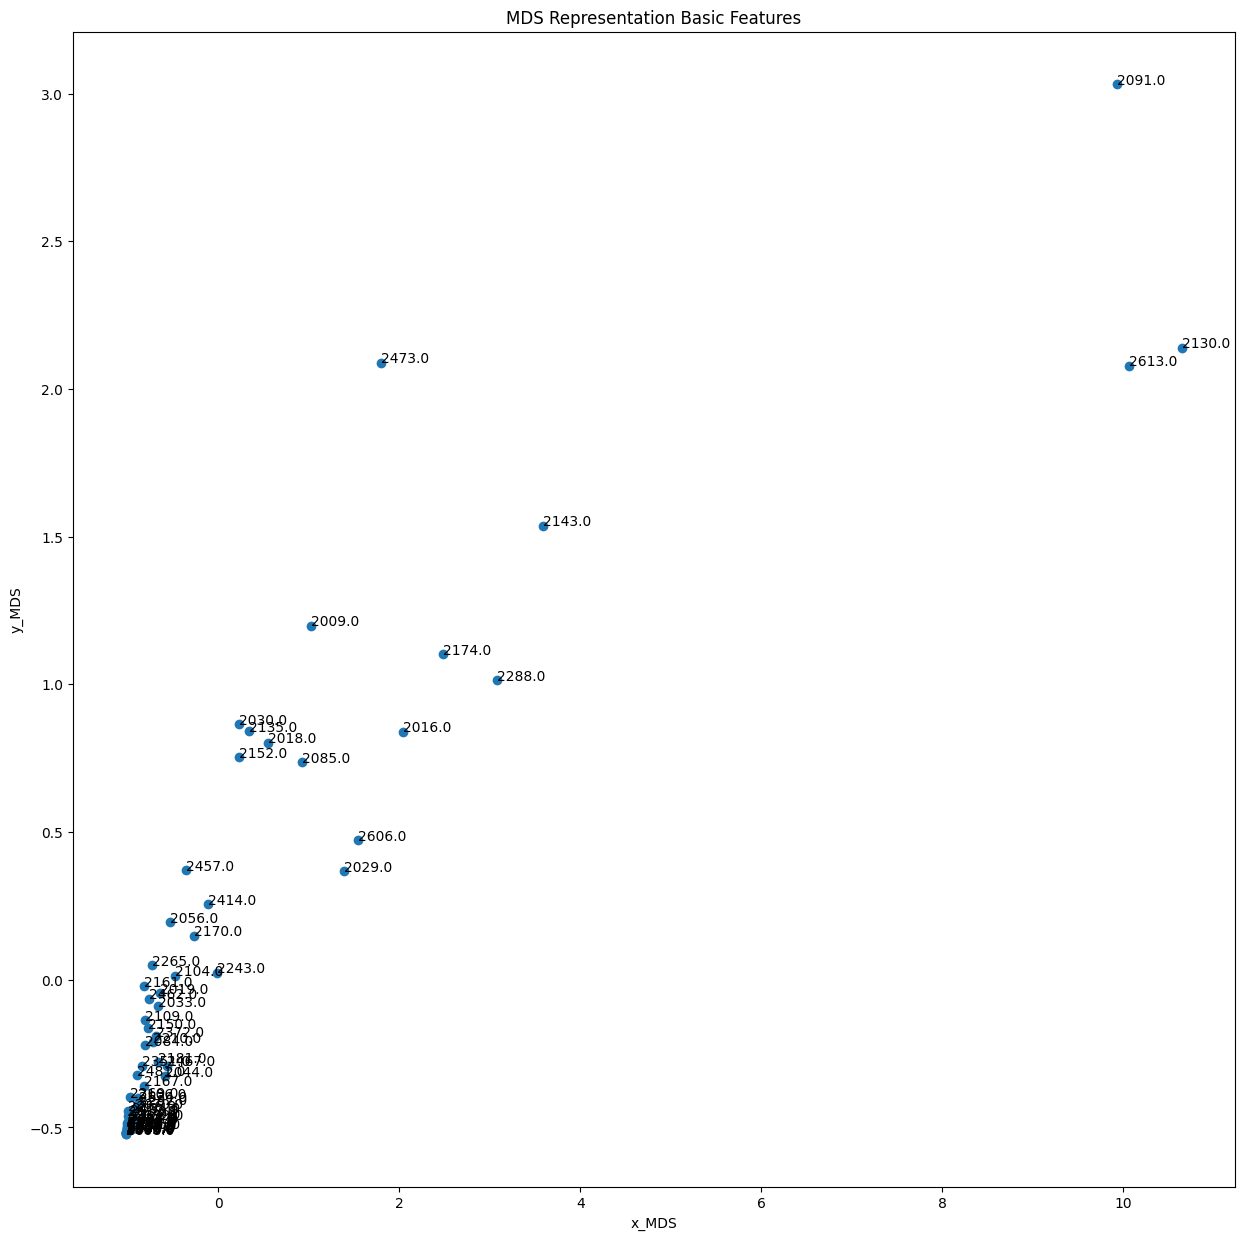

In [52]:
basic_features_all_df = pd.DataFrame(columns=['Stationsnummer', 'mean', 'std', 'min', 'max', 'median', 'range'])
for station_number in flow_temp_df['Stationsnummer'].unique():
    station_data = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    basic_features_all_df = basic_features_all_df.append({'Stationsnummer': station_number, 'mean': station_data[Wert].mean(), 'std': station_data[Wert].std(), 'min': station_data[Wert].min(), 'max': station_data[Wert].max(), 'median': station_data[Wert].median(), 'range': station_data[Wert].max()-station_data[Wert].min()}, ignore_index=True)

basic_features_normalized_all_df = dfmf.normalize_data(basic_features_all_df)
basic_mds_all_df = dfmf.create_mds_represntation(basic_features_normalized_all_df)

#plot the mds representation
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 15))
ax1.scatter(basic_mds_all_df['x_MDS'], basic_mds_all_df['y_MDS'])
ax1.set_title('MDS Representation Basic Features')
ax1.set_xlabel('x_MDS')
ax1.set_ylabel('y_MDS')
# add stationsnummer to each point
for i, txt in enumerate(basic_mds_all_df['Stationsnummer']):
    ax1.annotate(txt, (basic_mds_all_df['x_MDS'][i], basic_mds_all_df['y_MDS'][i]))

basic_features_all_df.head()

## Results:
- clusters can be seen visually on the mds plot
- this already with rudimentary features and no feature selection
- the clusters are not perfect but they are clearly visible


# 4. Additional Features
- goal: to find the best features for the clustering
- calculate a lot of features and then select the best ones
- as discussed in the meeting 
    - max slope of the curve (done could be better)
    - time of Scheitelpunkt (done)
    - time above a average (done)
    - time of first upwards crossing of a threshold (done and downwards as well)
    - number of local maximas (not done)
    

In [53]:
#calculate the more advanced features
import df_manipulation_functions as dfmf
#reload the df_manipulation_functions.py file
import importlib
importlib.reload(dfmf)


#max slope of the running mean
additional_features_all = pd.DataFrame()
for station_number in flow_temp_df['Stationsnummer'].unique():
    station_data = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    original_station_data = dfmf.get_station_df(station_number, flow_temp_df)
    #additional_features_all = additional_features_all.append({'Stationsnummer': station_number, 'max_slope': dfmf.get_max_slope(station_data),'day_of_max': dfmf.get_day_of_max(station_data)}, ignore_index=True, )
    additional_features_all = additional_features_all.append({
        'Stationsnummer': station_number,
              'time_above_average': dfmf.get_time_above_average(station_data,Wert),
                        'similarity_to_mean_year': dfmf.get_similarity_to_mean_year(original_station_data, Wert),
                        'day_of_max': dfmf.get_day_of_max(station_data,Wert),
                        'day_of_min': dfmf.get_day_of_min(station_data,Wert),
                          'day_first_upward_crossing_mean': dfmf.get_time_first_upward_crossing_mean(station_data,Wert),
                          'day_first_downward_crossing_mean' : dfmf.get_time_first_downward_crossing_mean(station_data,Wert),
                            'day_first_upward_crossing_high_quartile' :dfmf.get_time_first_upward_crossing_highquantile(station_data,Wert),
                              'day_downward_crossing_high_quartile' :dfmf.get_time_first_downward_crossing_highquantile(station_data,Wert),
                                'day_downward_crossing_low_quartile' :dfmf.get_time_first_downward_crossing_lowquantile(station_data,Wert),
                                'day_upward_crossing_low_quartile' :dfmf.get_time_first_upward_crossing_lowquantile(station_data,Wert),
                                #'number_of_maximas' : dfmf.get_number_of_maximas(station_data, Wert),
                                'number_of_peaks' : dfmf.get_number_of_peaks(station_data, Wert, distance=7),
                                'min_slope_5days': dfmf.get_min_slope(station_data,Wert,5),
                                'max_slope_5days': dfmf.get_max_slope(station_data,Wert,5),},      
                              ignore_index=True)

additional_features_all.head()
display(additional_features_all)

# removed features because unstable
#'max_slope_5days': dfmf.get_max_slope(station_data,'Flow_Wert',5),
                  #    'max_slope_2days': dfmf.get_max_slope(station_data,'Flow_Wert',2),


C:\Users\janzu\AppData\Local\Temp\ipykernel_25812\689351943.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  additional_features_all = additional_features_all.append({
C:\Users\janzu\AppData\Local\Temp\ipykernel_25812\689351943.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  additional_features_all = additional_features_all.append({
C:\Users\janzu\AppData\Local\Temp\ipykernel_25812\689351943.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  additional_features_all = additional_features_all.append({
C:\Users\janzu\AppData\Local\Temp\ipykernel_25812\689351943.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  additional_feat

,Stationsnummer,time_above_average,similarity_to_mean_year,day_of_max,day_of_min,day_first_upward_crossing_mean,day_first_downward_crossing_mean,day_first_upward_crossing_high_quartile,day_downward_crossing_high_quartile,day_downward_crossing_low_quartile,day_upward_crossing_low_quartile,number_of_peaks,min_slope_5days,max_slope_5days
0,2009.0,136.0,3200.007522,191.0,366.0,135.0,270.0,158.0,242.0,282.0,127.0,13.0,-22.972359,22.144363
1,2016.0,145.0,4821.109923,168.0,340.0,97.0,241.0,139.0,181.0,21.0,358.0,14.0,-21.028070,27.734455
2,2018.0,144.0,4282.846248,171.0,32.0,121.0,264.0,148.0,210.0,283.0,100.0,8.0,-19.839335,12.589743
3,2019.0,148.0,3543.289277,198.0,366.0,129.0,276.0,158.0,251.0,296.0,118.0,14.0,-4.660831,5.967659
4,2029.0,151.0,4997.246654,168.0,61.0,101.0,251.0,139.0,201.0,259.0,95.0,11.0,-17.137644,19.082642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2612.0,132.0,4987.212154,131.0,36.0,106.0,325.0,121.0,171.0,330.0,96.0,21.0,-2.156058,2.063364
71,2613.0,138.0,2400.659433,166.0,340.0,117.0,254.0,144.0,186.0,263.0,98.0,14.0,-84.474564,80.316767
72,2617.0,122.0,1436.982127,171.0,69.0,126.0,247.0,154.0,185.0,276.0,124.0,6.0,-0.585596,0.542208
73,2634.0,140.0,8980.455683,135.0,30.0,73.0,212.0,99.0,171.0,366.0,69.0,28.0,-2.223988,3.012366


# 5. All features together


c:\Users\janzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\janzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


,mean,std,min,max,median,range,Stationsnummer,time_above_average,similarity_to_mean_year,day_of_max,day_of_min,day_first_upward_crossing_mean,day_first_downward_crossing_mean,day_first_upward_crossing_high_quartile,day_downward_crossing_high_quartile,day_downward_crossing_low_quartile,day_upward_crossing_low_quartile,number_of_peaks,min_slope_5days,max_slope_5days
0,0.426487,1.032352,0.225587,0.562418,0.277655,0.866365,2009.0,-0.779040,-0.347767,0.703780,1.419632,-0.428829,0.567401,-0.274481,0.944840,0.651451,-0.695285,-0.615581,-0.571427,0.545911
1,0.993242,0.596083,1.161628,0.904861,1.006206,0.643076,2016.0,-0.317361,0.435833,0.312413,1.214544,-0.763944,0.255445,-0.469172,0.203900,-1.781239,1.359263,-0.494403,-0.478934,0.802049
2,0.202062,0.638822,0.074180,0.322229,0.174586,0.548136,2018.0,-0.368659,0.175650,0.363461,-1.214964,-0.552292,0.502858,-0.376950,0.556150,0.660772,-0.935427,-1.221467,-0.422384,0.108118
3,-0.270591,-0.150262,-0.307291,-0.261083,-0.285957,-0.211755,2019.0,-0.163469,-0.181833,0.822892,1.419632,-0.481742,0.631943,-0.274481,1.054159,0.781940,-0.775333,-0.494403,0.299683,-0.195306
4,0.628958,0.498810,0.707631,0.598974,0.579857,0.483319,2029.0,-0.009576,0.520973,0.312413,-0.986212,-0.728668,0.363016,-0.469172,0.446831,0.437076,-0.979898,-0.857935,-0.293860,0.405623


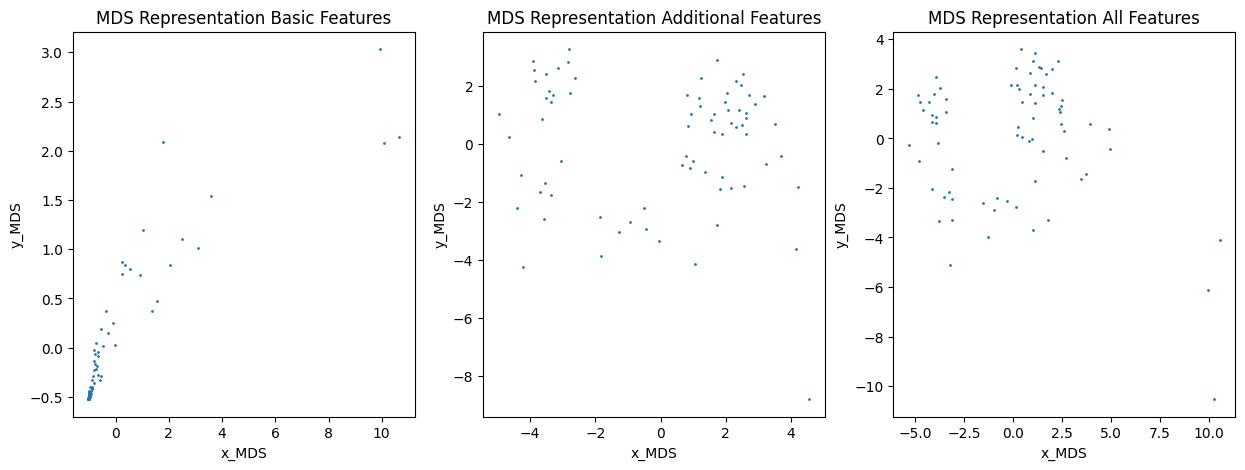

In [54]:
#calculate the more advanced features
import df_manipulation_functions as dfmf
#reload the df_manipulation_functions.py file
import importlib
importlib.reload(dfmf)


#concatenate all the features
all_features_flow = pd.merge(basic_features_all_df, additional_features_all, on='Stationsnummer')
# normalize additional features
additional_features_all_normalized = dfmf.normalize_data(additional_features_all)
#concatenate the normalized additional features with the normalized basic features
all_features_normalized_flow = pd.merge(basic_features_normalized_all_df, additional_features_all_normalized, on='Stationsnummer')
additional_features_all_mds = dfmf.create_mds_represntation(additional_features_all_normalized)

# get mds representation of the normalized additional features
all_mds_all_df = dfmf.create_mds_represntation(all_features_normalized_flow)

#plot the mds for all features and the rudia features
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(basic_mds_all_df['x_MDS'], basic_mds_all_df['y_MDS'], s=1)
ax1.set_title('MDS Representation Basic Features')
ax1.set_xlabel('x_MDS')
ax1.set_ylabel('y_MDS')
ax2.scatter(additional_features_all_mds['x_MDS'], additional_features_all_mds['y_MDS'], s=1)
ax2.set_title('MDS Representation Additional Features')
ax2.set_xlabel('x_MDS')
ax2.set_ylabel('y_MDS')
ax3.scatter(all_mds_all_df['x_MDS'], all_mds_all_df['y_MDS'], s=1)
ax3.set_title('MDS Representation All Features')
ax3.set_xlabel('x_MDS')
ax3.set_ylabel('y_MDS')


#set scale to the same
ax1.set_xlim(ax1.get_xlim())
ax1.set_ylim(ax1.get_ylim())

# #save all features to pickle file
# all_features_all.to_pickle('Flow_Features/all_features_flow.pkl')

# # save ruda features to pickle file
# basic_features_all_df.to_pickle('Flow_Features/basic_features_flow.pkl')

# # save additional features to pickle file
# additional_features_all.to_pickle('Flow_Features/additional_features_flow.pkl')

# #save all normalized features to pickle file
# all_normalized_all_df.to_pickle('Flow_Features/all_normalized_flow.pkl')

# #save ruda normalized features to pickle file
# basic_features_normalized_all_df.to_pickle('Flow_Features/basic_normalized_flow.pkl')

# #save additional features normalized to pickle file
# additional_features_all_normalized.to_pickle('Flow_Features/additional_normalized_flow.pkl')

# #save the mds data to pickle file
# all_mds_all_df.to_pickle('Flow_mds/all_mds_flow.pkl')

# #save th ruda mds data to pickle file
# basic_mds_all_df.to_pickle('Flow_mds/basic_mds_flow.pkl')


all_features_normalized_flow.head()


## Result 
- the clusters are visible
- the importance of the additional features is very clear


# 6. Take periodicity for certain features into account 
- for all day features use\
    - day_sin = sin (day /365 *2pi)\
    - day_cos = cos (day /365 *2pi)

as new feature

In [55]:
#create feature dataframe with periodicity taken into account
#take all features all and replace the day of the year features with their sin and cosine function
import importlib
importlib.reload(dfmf)

#day_of_max
all_features_flow['day_of_max_sin'], all_features_flow['day_of_max_cos'] = dfmf.get_sin_cos_rep(all_features_flow['day_of_max'])
all_features_flow= all_features_flow.drop(['day_of_max'], axis=1)
#day_first_upward_crossing_mean
all_features_flow['day_first_upward_crossing_mean_sin'], all_features_flow['day_first_upward_crossing_mean_cos'] = dfmf.get_sin_cos_rep(all_features_flow['day_first_upward_crossing_mean'])
all_features_flow= all_features_flow.drop(['day_first_upward_crossing_mean'], axis=1)
#day_first_upward_crossing_high_quartile
all_features_flow['day_first_upward_crossing_high_quartile_sin'], all_features_flow['day_first_upward_crossing_high_quartile_cos'] = dfmf.get_sin_cos_rep(all_features_flow['day_first_upward_crossing_high_quartile'])
all_features_flow= all_features_flow.drop(['day_first_upward_crossing_high_quartile'], axis=1)
#day_downward_crossing_high_quartile
all_features_flow['day_downward_crossing_high_quartile_sin'], all_features_flow['day_downward_crossing_high_quartile_cos'] = dfmf.get_sin_cos_rep(all_features_flow['day_downward_crossing_high_quartile'])
all_features_flow= all_features_flow.drop(['day_downward_crossing_high_quartile'], axis=1)
#day_downward_crossing_low_quartile
all_features_flow['day_downward_crossing_low_quartile_sin'], all_features_flow['day_downward_crossing_low_quartile_cos'] = dfmf.get_sin_cos_rep(all_features_flow['day_downward_crossing_low_quartile'])
all_features_flow= all_features_flow.drop(['day_downward_crossing_low_quartile'], axis=1)
#day_upward_crossing_low_quartile
all_features_flow['day_upward_crossing_low_quartile_sin'], all_features_flow['day_upward_crossing_low_quartile_cos'] = dfmf.get_sin_cos_rep(all_features_flow['day_upward_crossing_low_quartile'])
all_features_flow= all_features_flow.drop(['day_upward_crossing_low_quartile'], axis=1)
#day_first_downward_crossing_mean
all_features_flow['day_first_downward_crossing_mean_sin'], all_features_flow['day_first_downward_crossing_mean_cos'] = dfmf.get_sin_cos_rep(all_features_flow['day_first_downward_crossing_mean'])
all_features_flow= all_features_flow.drop(['day_first_downward_crossing_mean'], axis=1)
#day_of_min
all_features_flow['day_of_min_sin'], all_features_flow['day_of_min_cos'] = dfmf.get_sin_cos_rep(all_features_flow['day_of_min'])
all_features_flow= all_features_flow.drop(['day_of_min'], axis=1)






all_features_flow.head()

,Stationsnummer,mean,std,min,max,median,range,time_above_average,similarity_to_mean_year,number_of_peaks,...,day_downward_crossing_high_quartile_sin,day_downward_crossing_high_quartile_cos,day_downward_crossing_low_quartile_sin,day_downward_crossing_low_quartile_cos,day_upward_crossing_low_quartile_sin,day_upward_crossing_low_quartile_cos,day_first_downward_crossing_mean_sin,day_first_downward_crossing_mean_cos,day_of_min_sin,day_of_min_cos
0,2009.0,191.718588,78.184269,99.655775,337.357060,146.840939,237.701285,136.0,3200.007522,13.0,...,-0.854322,-0.519744,-0.989932,0.141540,0.816538,-0.577292,-0.997917,-0.064508,0.017213,0.999852
1,2016.0,317.204267,56.663119,248.814842,448.665434,299.042810,199.850592,145.0,4821.109923,14.0,...,0.025818,-0.999667,0.353676,0.935368,-0.120208,0.992749,-0.845249,-0.534373,-0.417194,0.908818
2,2018.0,142.028263,58.771445,75.528888,259.285767,125.308693,183.756880,144.0,4282.846248,8.0,...,-0.455907,-0.890028,-0.987349,0.158559,0.988678,-0.150055,-0.985948,-0.167052,0.523416,0.852078
3,2019.0,37.377797,19.845988,14.741146,69.685184,29.096628,54.944038,148.0,3543.289277,14.0,...,-0.924291,-0.381689,-0.927542,0.373720,0.895839,-0.444378,-0.999250,0.038722,0.017213,0.999852
4,2029.0,236.547887,51.864645,176.469974,349.239436,209.973965,172.769462,151.0,4997.246654,11.0,...,-0.313107,-0.949718,-0.967938,-0.251190,0.997917,-0.064508,-0.924291,-0.381689,0.867456,0.497513


In [56]:
all_features_normalized_flow = dfmf.normalize_data(all_features_flow)
all_mds_all_df = dfmf.create_mds_represntation(all_features_normalized_flow)

#save all features in a pickle file 
all_features_flow.to_pickle('Flow_Features/all_features_flow.pkl')

all_features_normalized_flow.to_pickle('Flow_Features/all_normalized_flow.pkl')

all_mds_all_df.to_pickle('Flow_mds/all_mds_flow.pkl')

#save the basic flow features in a pickle file
basic_features_flow = all_features_flow[['Stationsnummer', 'mean','std', 'min', 'max',  'median', 'range']]
basic_features_flow.to_pickle('Flow_Features/basic_features_flow.pkl')
basic_features_normalized_flow = all_features_normalized_flow[['Stationsnummer', 'mean','std', 'min', 'max',  'median', 'range']]
basic_features_normalized_flow.to_pickle('Flow_Features/basic_features_normalized_flow.pkl')
basic_features_mds_flow = dfmf.create_mds_represntation(basic_features_normalized_flow)
basic_features_mds_flow.to_pickle('Flow_mds/basic_features_mds_flow.pkl')

#save the additional flow features in a pickle file
additional_features_flow = all_features_flow.drop(['mean','std', 'min', 'max',  'median', 'range'], axis=1)
additional_features_flow.to_pickle('Flow_Features/additional_features_flow.pkl')
additional_features_normalized_flow = all_features_normalized_flow.drop(['mean','std', 'min', 'max',  'median', 'range'], axis=1)
additional_features_normalized_flow.to_pickle('Flow_Features/additional_features_normalized_flow.pkl')
additional_features_mds_flow = dfmf.create_mds_represntation(additional_features_normalized_flow)
additional_features_mds_flow.to_pickle('Flow_mds/additional_features_mds_flow.pkl')


c:\Users\janzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\janzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\janzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(-0.700865662886254, 3.2095165777944774)

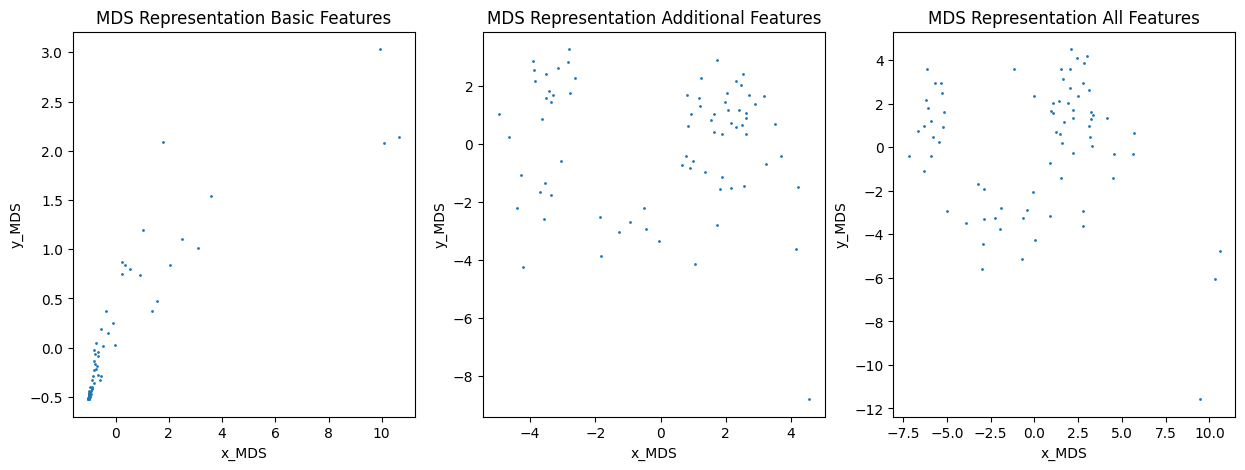

In [57]:
#plot the mds for all features and the rudia features
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(basic_mds_all_df['x_MDS'], basic_mds_all_df['y_MDS'], s=1)
ax1.set_title('MDS Representation Basic Features')
ax1.set_xlabel('x_MDS')
ax1.set_ylabel('y_MDS')
ax2.scatter(additional_features_all_mds['x_MDS'], additional_features_all_mds['y_MDS'], s=1)
ax2.set_title('MDS Representation Additional Features')
ax2.set_xlabel('x_MDS')
ax2.set_ylabel('y_MDS')
ax3.scatter(all_mds_all_df['x_MDS'], all_mds_all_df['y_MDS'], s=1)
ax3.set_title('MDS Representation All Features')
ax3.set_xlabel('x_MDS')
ax3.set_ylabel('y_MDS')


#set scale to the same
ax1.set_xlim(ax1.get_xlim())
ax1.set_ylim(ax1.get_ylim())
